# INSTALL LIBRARY TORCH #

In [ ]:
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
!pip install torchode

  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


# IMPORT LIBRARY & DATA #

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torchdiffeq import odeint_adjoint as odeint
from torchode import Tsit5, solve_ivp
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Membaca data proporsi asli
file_path = '/content/drive/MyDrive/TUGAS AKHIR Uhuy/dataku.xlsx'
data = pd.read_excel(file_path, sheet_name='data')
X_0 = data[['Wanita', 'Pria', 'Pakaian Kerja']].values
X_0

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Membaca data hasil transformasi ILR
file_path = '/content/drive/MyDrive/TUGAS AKHIR Uhuy/ILR.xlsx'
data = pd.read_excel(file_path, sheet_name='data')
S_0 = data[['S1(0)', 'S2(0)']].values
S_0

array([[-0.2294491 ,  3.36792266],
       [-0.26701366,  3.34118645],
       [-0.58369788,  3.3697657 ],
       [-0.72376922,  2.86675755],
       [-0.85289596,  2.32867719],
       [-0.79208589,  1.49840997],
       [-0.74490623,  1.9258104 ],
       [-0.62042004,  1.65545541],
       [-0.28135029,  1.77485907],
       [-0.42170305,  1.62669631],
       [-0.58410786,  1.08398219],
       [-0.51590087,  1.24020743],
       [-0.46972085,  1.00919646],
       [-0.2038269 ,  1.53957434],
       [-0.32490785,  2.13395491],
       [-0.18616104,  1.56439741]])

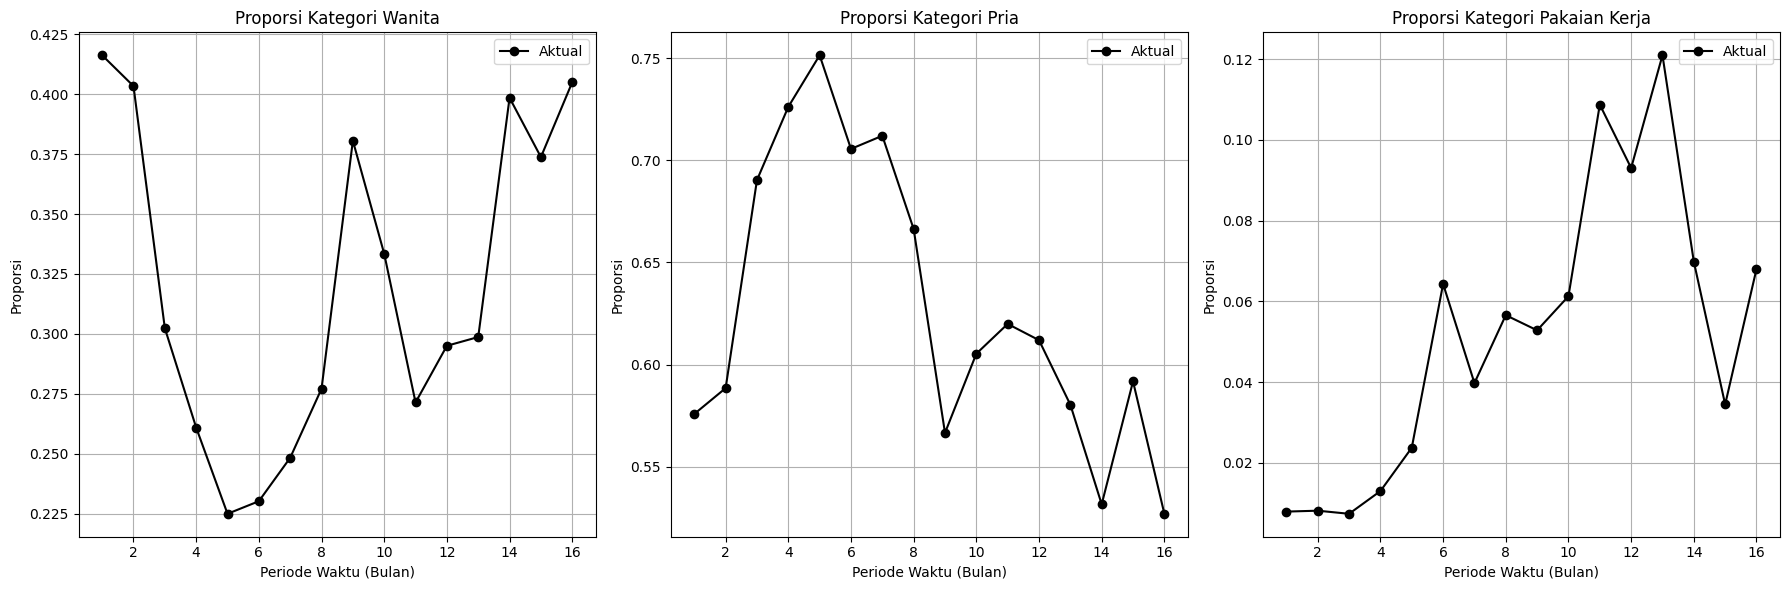

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )
    axs[i].set_title(f'Proporsi Kategori {variabels[i]}')
    axs[i].set_xlabel('Periode Waktu (Bulan)')
    axs[i].set_ylabel('Proporsi')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

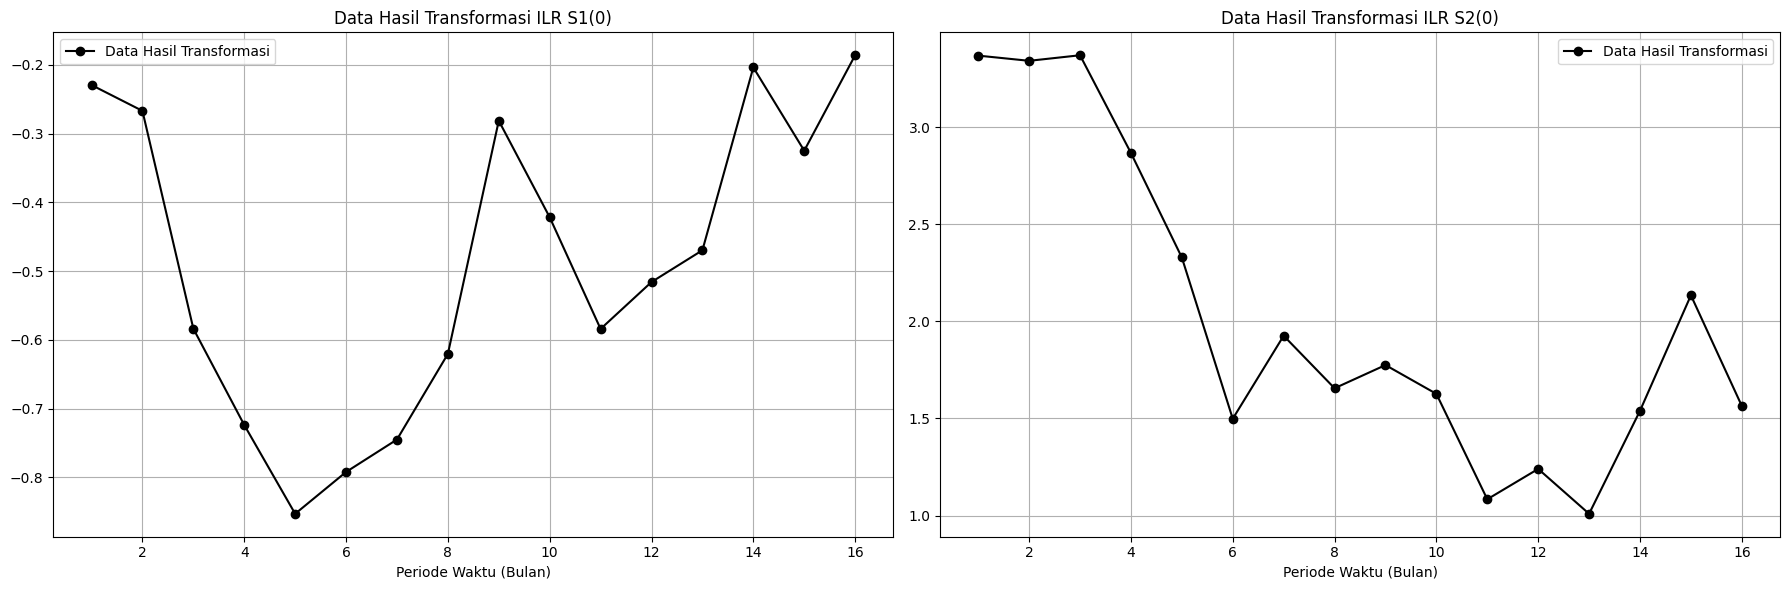

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )
    axs[i].set_title(f'Data Hasil Transformasi ILR {variabels[i]}')
    axs[i].set_xlabel('Periode Waktu (Bulan)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

# FORECASTING I #

## 90% Data Uji 10% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.9 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396]])
tensor([[-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.0769, 0.1538, 0.2308, 0.3077, 0.3846, 0.4615, 0.5385, 0.6154,
        0.6923, 0.7692, 0.8462, 0.9231, 1.0000])
tensor([1.0000, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(3, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(3, 32),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
            )

    def forward(self, t, z):
        t_tensor = torch.ones_like(z[..., :1]) * t
        zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)

        ilr1 = self.branch_wp(zt)
        ilr2 = self.branch_pk(zt)
        return torch.cat([ilr1, ilr2], dim=-1)  # Output shape: (batch, 2)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = mse_loss(pred, S_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}")


print("Training selesai!")

Epoch 0, Train Loss: 1.3701
Epoch 10, Train Loss: 0.1149
Epoch 20, Train Loss: 0.1227
Epoch 30, Train Loss: 0.0666
Epoch 40, Train Loss: 0.0722
Epoch 50, Train Loss: 0.0569
Epoch 60, Train Loss: 0.0495
Epoch 70, Train Loss: 0.0458
Epoch 80, Train Loss: 0.0489
Early stopped!
Training selesai!


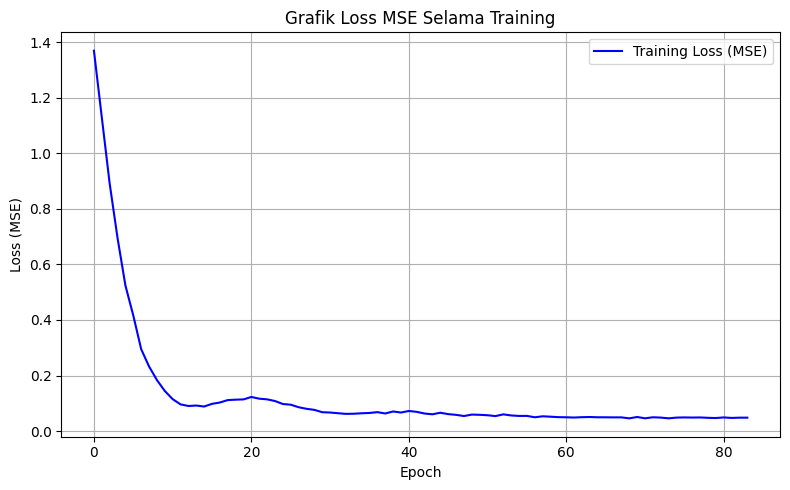

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss (MSE)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss MSE Selama Training')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.4076,  3.0998],
        [-0.5226,  2.8366],
        [-0.6703,  2.5791],
        [-0.7477,  2.3288],
        [-0.7767,  2.0870],
        [-0.7562,  1.8755],
        [-0.6717,  1.7366],
        [-0.6318,  1.5857],
        [-0.5753,  1.4393],
        [-0.4869,  1.4081],
        [-0.4271,  1.3781],
        [-0.3399,  1.4314],
        [-0.2942,  1.3933]])
tensor([[-0.2038,  1.5396],
        [-0.1489,  1.5148]])
tensor([-0.2231,  1.2316])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.35592196 0.63341797 0.01066007]
 [0.31859651 0.6671161  0.01428739]
 [0.27407498 0.70722307 0.01870195]
 [0.25146397 0.72390925 0.02462677]
 [0.24191125 0.72557296 0.03251578]
 [0.24477959 0.71320289 0.04201752]
 [0.2647421  0.68451401 0.05074389]
 [0.27264028 0.66623801 0.06112171]
 [0.28460678 0.64205421 0.07333902]
 [0.30841599 0.61401299 0.07757102]
 [0.32473249 0.59404815 0.08121936]
 [0.35240996 0.56995182 0.07763821]
 [0.365029   0.55339054 0.08158046]]
[[0.39850771 0.531648   0.06984429]
 [0.4152395  0.51259966 0.07216084]]
[[0.38023417 0.52125966 0.09850617]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1)              # [1, 2, 3, ..., 12]
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # [13, 14, 15, 16]
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # [17]

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Waktu plot testing: [15 16]
Waktu plot future: [17]


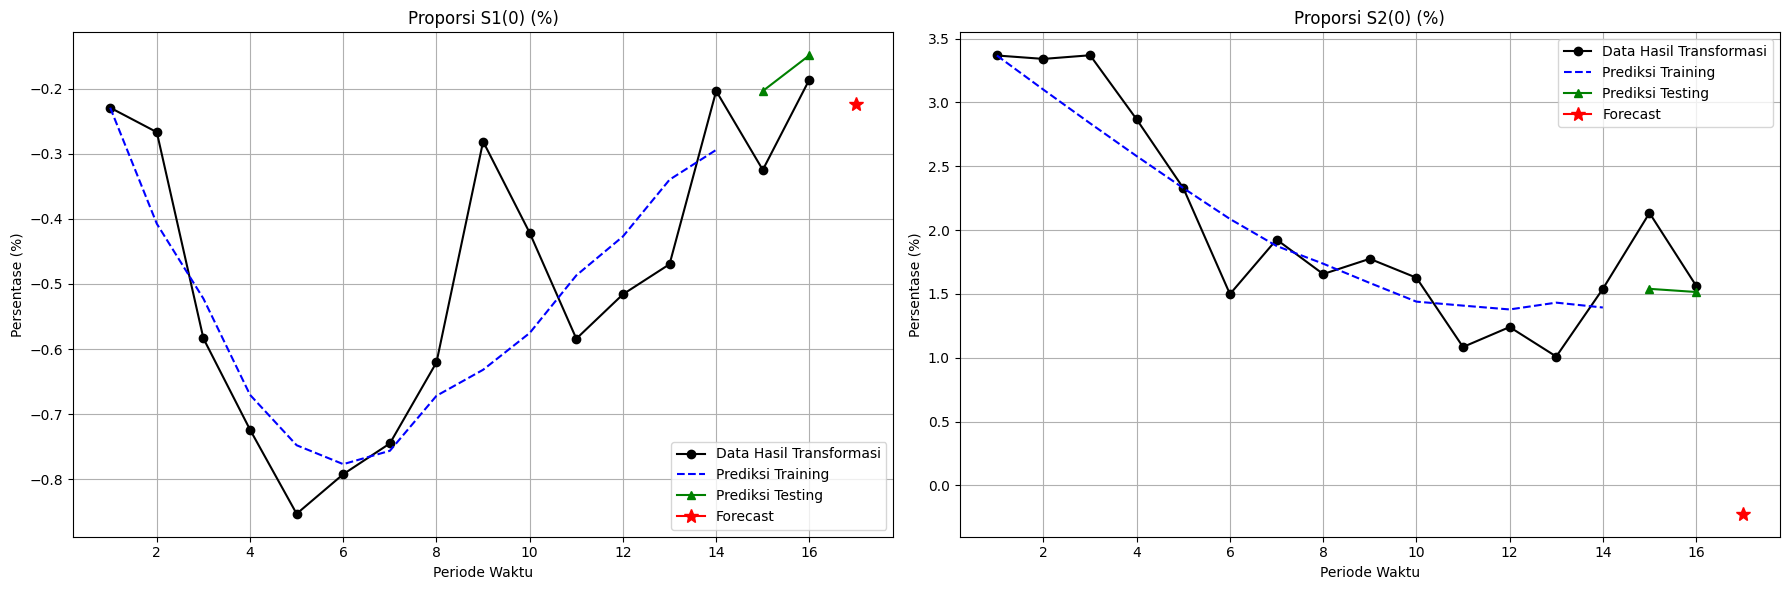

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

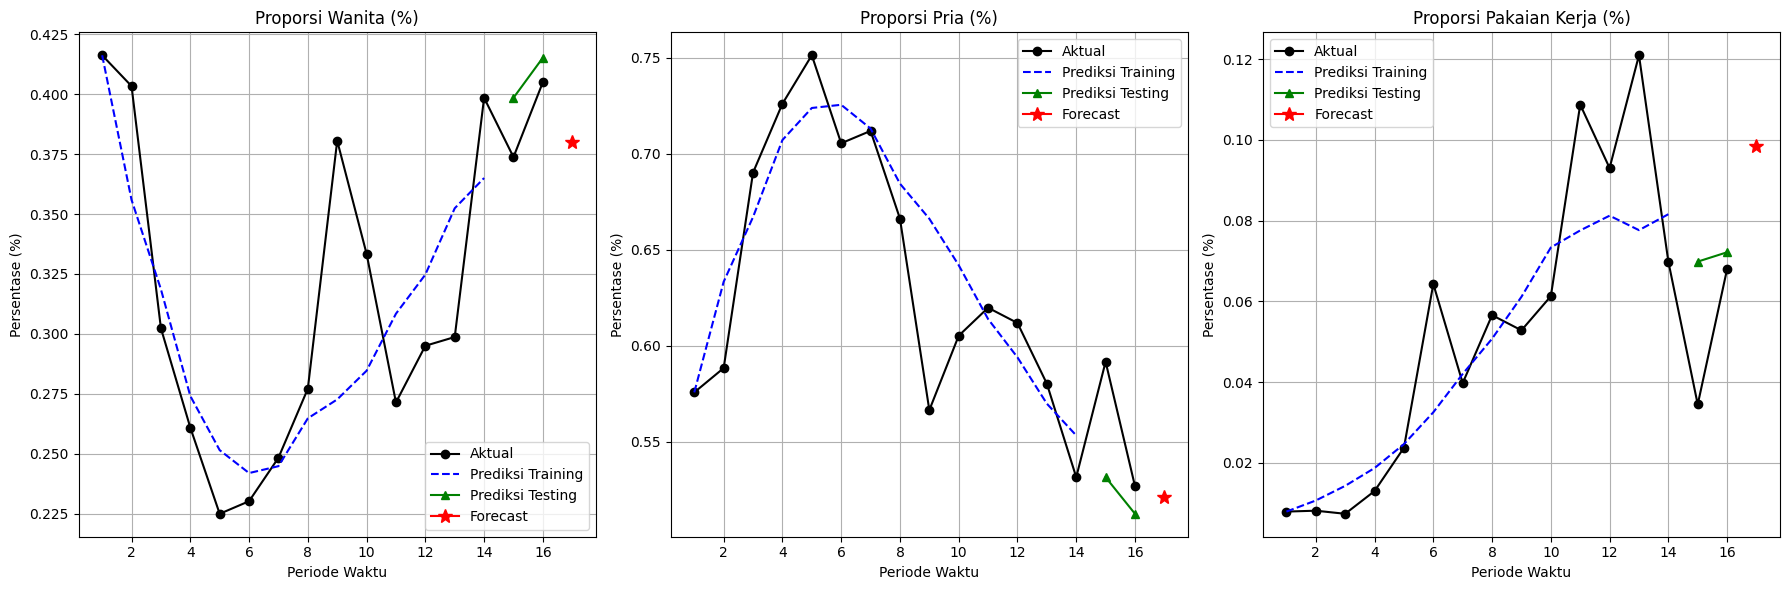

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # [11, 12, 13]
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [14, 15, 16]
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 13.38%

MAPE pada Data Testing: 21.80%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 9.86%
MAPE Testing Wanita: 4.57%
MAPE Training Pria: 4.03%
MAPE Testing Pria: 6.45%
MAPE Training Pakaian Kerja: 26.24%
MAPE Testing Pakaian Kerja: 54.40%


## 85% Data Uji 15% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.85 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092]])
tensor([[-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.0833, 0.1667, 0.2500, 0.3333, 0.4167, 0.5000, 0.5833, 0.6667,
        0.7500, 0.8333, 0.9167, 1.0000])
tensor([1.0000, 1.1000, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(3, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(3, 32),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
            )

    def forward(self, t, z):
        t_tensor = torch.ones_like(z[..., :1]) * t
        zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)

        ilr1 = self.branch_wp(zt)
        ilr2 = self.branch_pk(zt)
        return torch.cat([ilr1, ilr2], dim=-1)  # Output shape: (batch, 2)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = mse_loss(pred, S_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}")


print("Training selesai!")

Epoch 0, Train Loss: 1.4006
Epoch 10, Train Loss: 0.0803
Epoch 20, Train Loss: 0.0956
Epoch 30, Train Loss: 0.0598
Epoch 40, Train Loss: 0.0625
Epoch 50, Train Loss: 0.0548
Epoch 60, Train Loss: 0.0508
Epoch 70, Train Loss: 0.0481
Epoch 80, Train Loss: 0.0472
Epoch 90, Train Loss: 0.0438
Epoch 100, Train Loss: 0.0462
Epoch 110, Train Loss: 0.0460
Early stopped!
Training selesai!


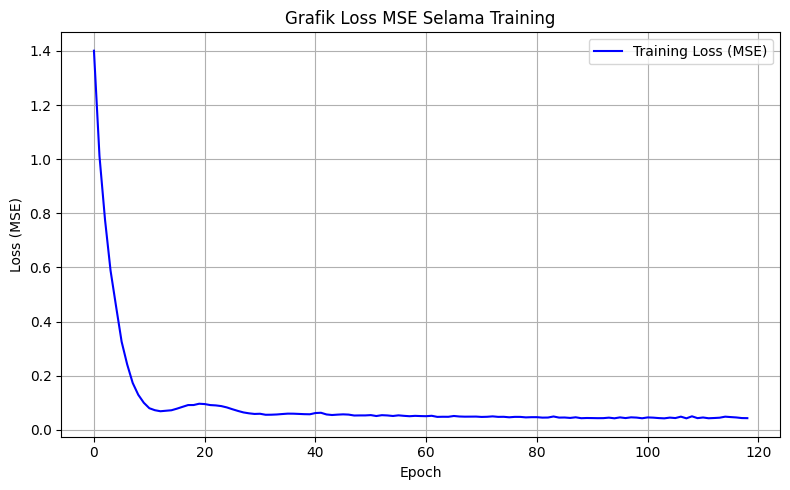

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss (MSE)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss MSE Selama Training')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.4077,  3.1130],
        [-0.5864,  2.8616],
        [-0.6811,  2.6082],
        [-0.7662,  2.3563],
        [-0.7592,  2.1084],
        [-0.7086,  1.8804],
        [-0.6788,  1.6799],
        [-0.6790,  1.5166],
        [-0.6243,  1.3664],
        [-0.6061,  1.2836],
        [-0.5617,  1.1695],
        [-0.5105,  1.0652]])
tensor([[-0.4697,  1.0092],
        [-0.3766,  1.0004],
        [-0.3282,  0.9207]])
tensor([-0.4161,  1.0762])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.3559386  0.63357182 0.01048958]
 [0.29966538 0.68670092 0.0136337 ]
 [0.27125326 0.71074857 0.01799816]
 [0.24683748 0.72948067 0.02368185]
 [0.24659442 0.72151524 0.03189034]
 [0.25713803 0.70044048 0.04242149]
 [0.26192138 0.68399186 0.05408676]
 [0.25875399 0.6759748  0.06527121]
 [0.26958201 0.65178055 0.07863744]
 [0.27208824 0.64119491 0.08671685]
 [0.28024062 0.62021982 0.09953956]
 [0.29004563 0.59706792 0.11288645]]
[[0.2986766  0.58035905 0.12096435]
 [0.32397683 0.55184681 0.12417636]
 [0.33343247 0.53039541 0.13617211]]
[[0.31642696 0.56991802 0.11365502]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1)              # [1, 2, 3, ..., 12]
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # [13, 14, 15, 16]
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # [17]

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Waktu plot testing: [14 15 16]
Waktu plot future: [17]


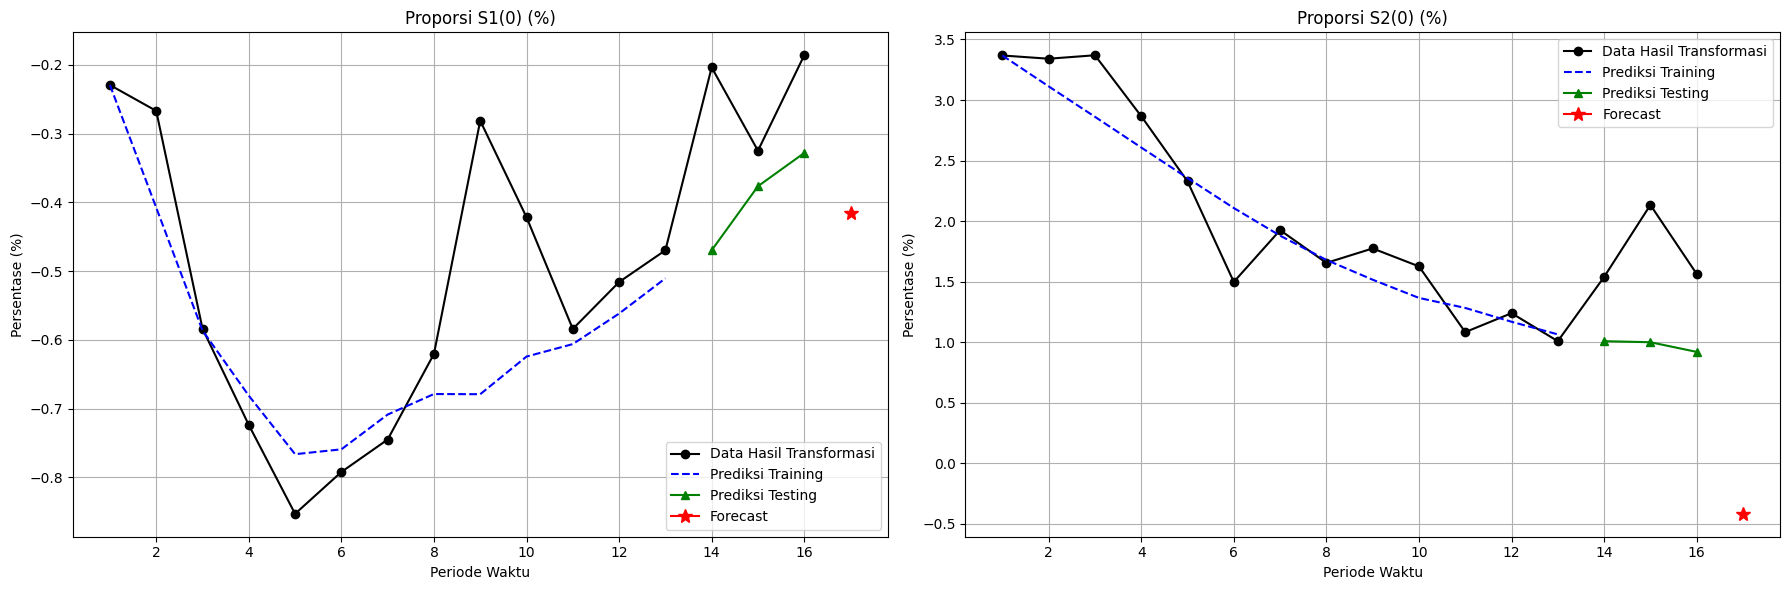

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

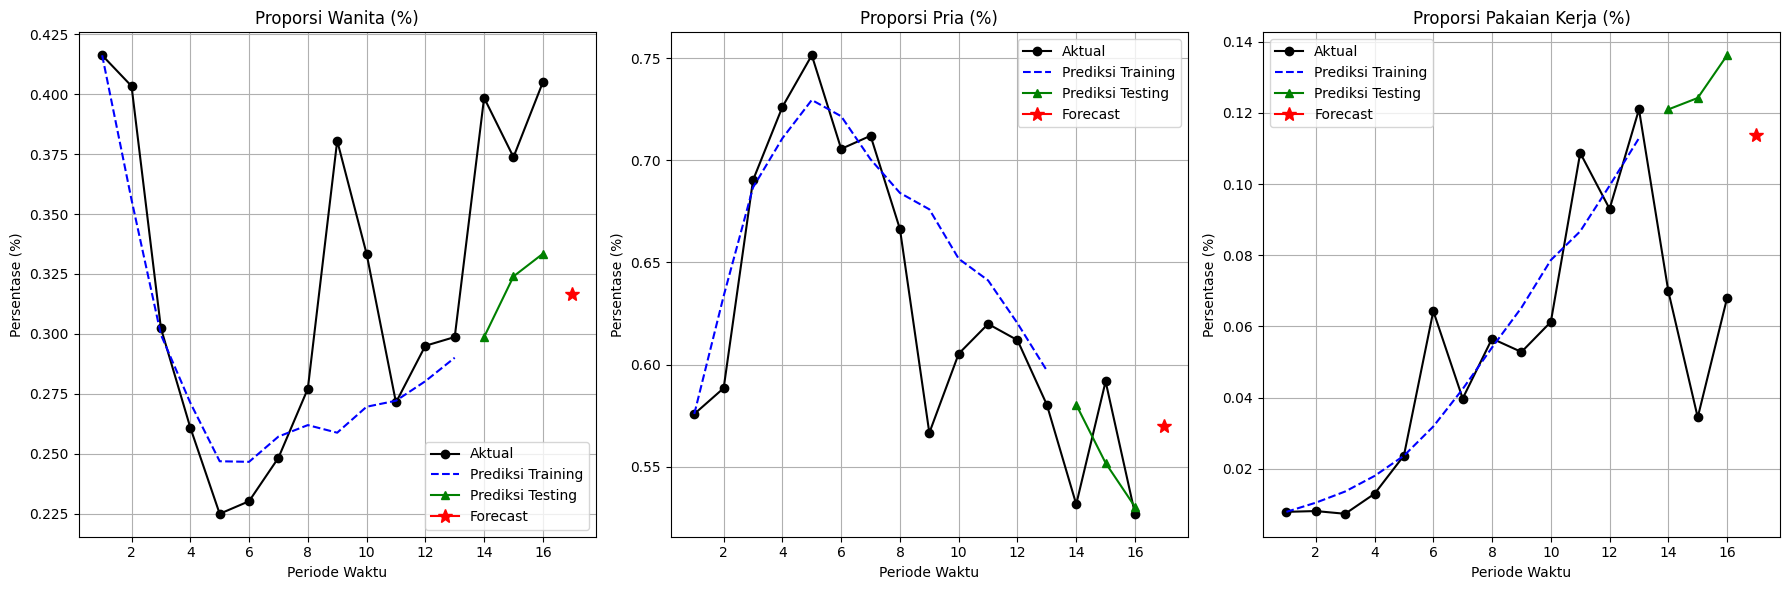

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # [11, 12, 13]
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [14, 15, 16]
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 11.70%

MAPE pada Data Testing: 56.26%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 7.84%
MAPE Testing Wanita: 18.68%
MAPE Training Pria: 4.18%
MAPE Testing Pria: 5.52%
MAPE Training Pakaian Kerja: 23.07%
MAPE Testing Pakaian Kerja: 144.59%


## 80% Data Uji 20% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.8 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402]])
tensor([[-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.0909, 0.1818, 0.2727, 0.3636, 0.4545, 0.5455, 0.6364, 0.7273,
        0.8182, 0.9091, 1.0000])
tensor([1.0000, 1.0667, 1.1333, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(3, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(3, 32),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
            )

    def forward(self, t, z):
        t_tensor = torch.ones_like(z[..., :1]) * t
        zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)

        ilr1 = self.branch_wp(zt)
        ilr2 = self.branch_pk(zt)
        return torch.cat([ilr1, ilr2], dim=-1)  # Output shape: (batch, 2)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = mse_loss(pred, S_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}")


print("Training selesai!")

Epoch 0, Train Loss: 1.0888
Epoch 10, Train Loss: 0.0790
Epoch 20, Train Loss: 0.0802
Epoch 30, Train Loss: 0.0653
Epoch 40, Train Loss: 0.0558
Epoch 50, Train Loss: 0.0527
Epoch 60, Train Loss: 0.0504
Epoch 70, Train Loss: 0.0500
Epoch 80, Train Loss: 0.0487
Epoch 90, Train Loss: 0.0488
Epoch 100, Train Loss: 0.0494
Epoch 110, Train Loss: 0.0490
Epoch 120, Train Loss: 0.0493
Early stopped!
Training selesai!


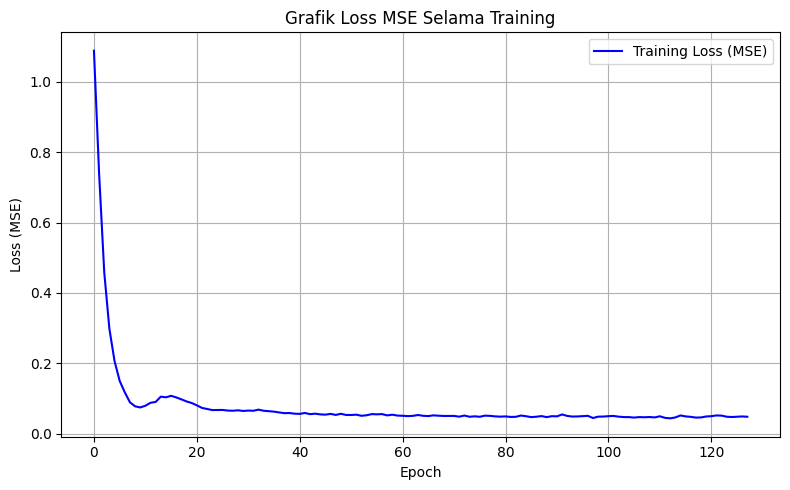

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss (MSE)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss MSE Selama Training')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.4139,  3.1101],
        [-0.5922,  2.8535],
        [-0.7154,  2.6139],
        [-0.7701,  2.3605],
        [-0.8075,  2.1205],
        [-0.7975,  1.8979],
        [-0.7975,  1.7512],
        [-0.6895,  1.5951],
        [-0.6182,  1.4342],
        [-0.5290,  1.3681],
        [-0.4405,  1.2867]])
tensor([[-0.5159,  1.2402],
        [-0.4364,  1.2317],
        [-0.3803,  1.1855],
        [-0.3132,  1.1131]])
tensor([-0.3686,  1.2843])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.35394588 0.63554045 0.01051368]
 [0.29792419 0.68832953 0.01374628]
 [0.26191739 0.72040123 0.01768138]
 [0.24587014 0.73059931 0.02353055]
 [0.2344795  0.73460503 0.03091546]
 [0.23468887 0.72495425 0.04035688]
 [0.23284753 0.71923374 0.04791873]
 [0.25756865 0.6829732  0.05945815]
 [0.27290203 0.65415585 0.07294212]
 [0.29541055 0.62420208 0.08038737]
 [0.31777071 0.59248199 0.08974731]]
[[0.29502297 0.61194792 0.09302911]
 [0.3169623  0.58755751 0.09548019]
 [0.33127292 0.56723653 0.10149055]
 [0.34764409 0.54137471 0.1109812 ]]
[[0.3385851  0.57026133 0.09115357]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1)              # [1, 2, 3, ..., 12]
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # [13, 14, 15, 16]
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # [17]

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Waktu plot testing: [13 14 15 16]
Waktu plot future: [17]


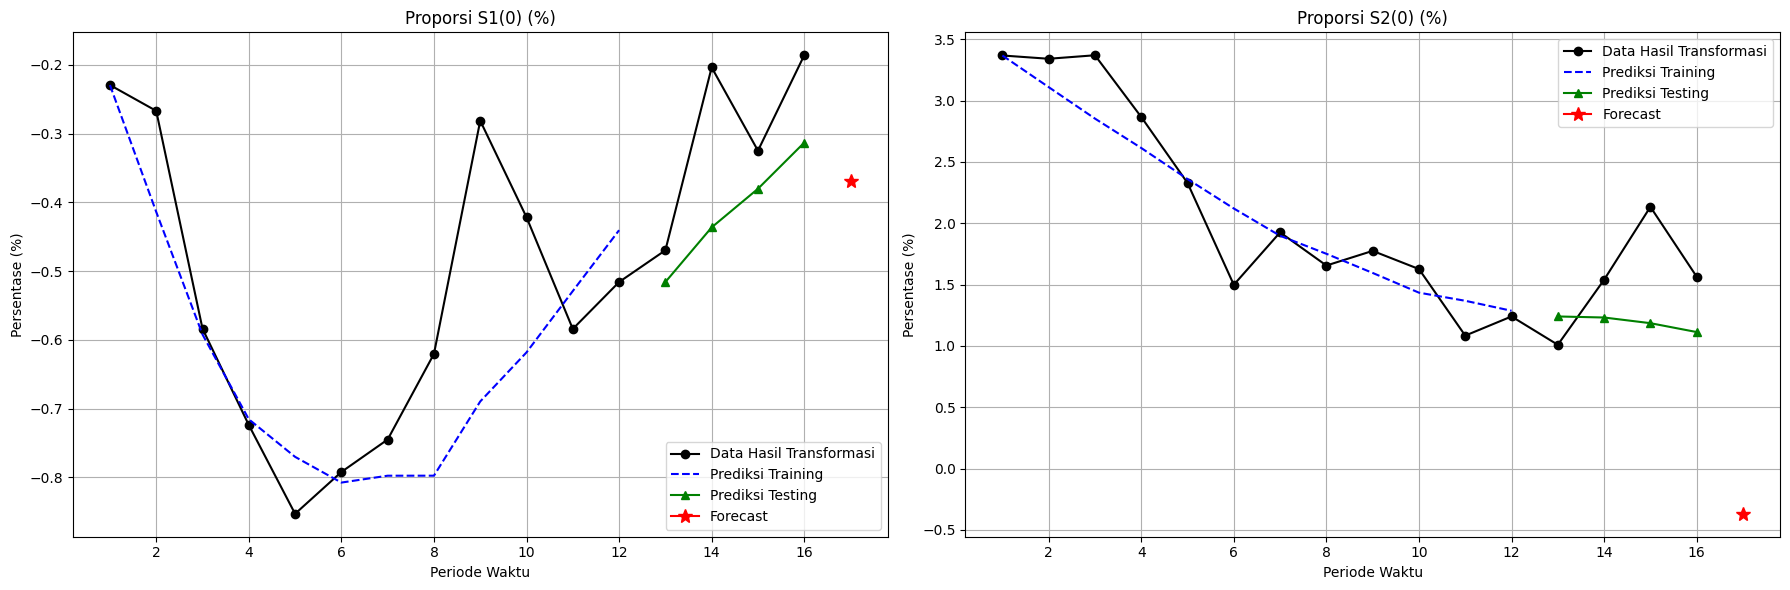

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

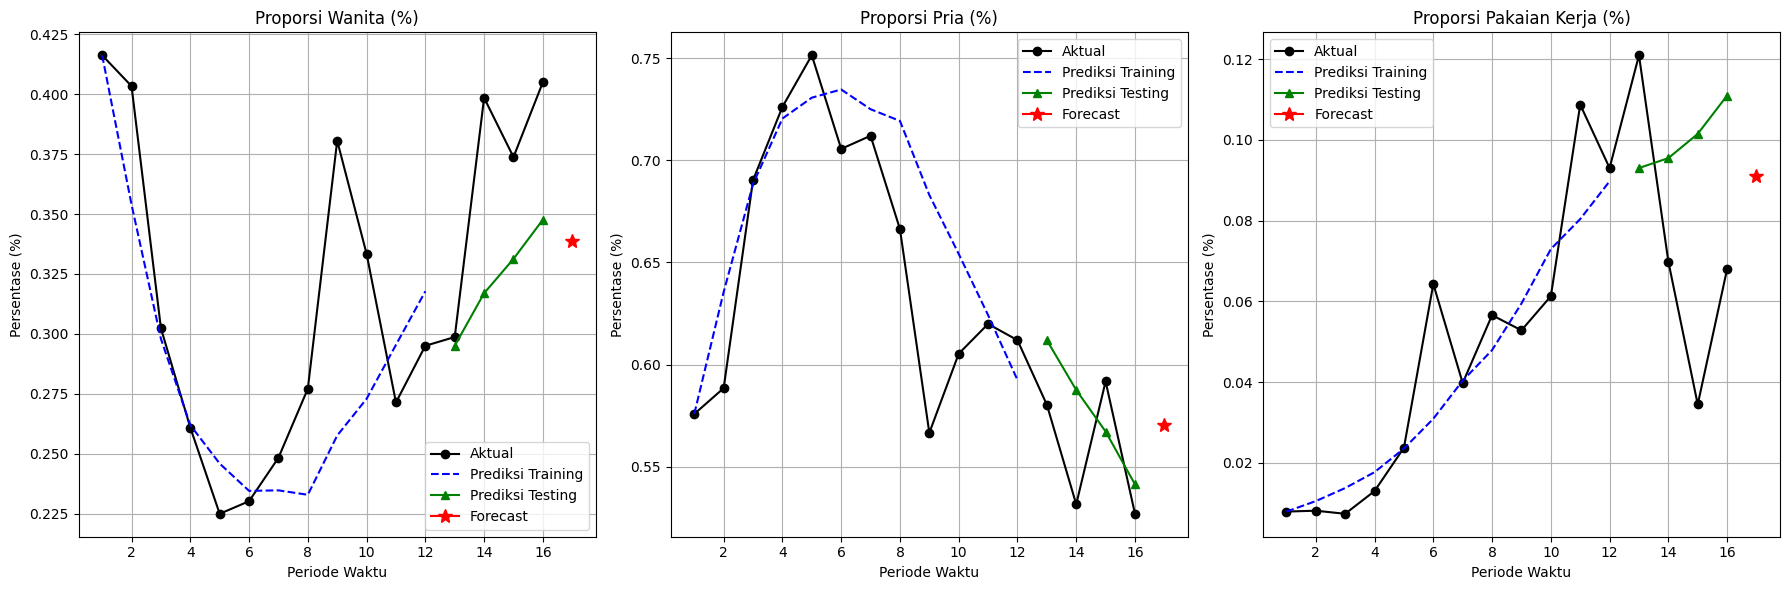

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # [11, 12, 13]
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [14, 15, 16]
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 12.63%

MAPE pada Data Testing: 32.30%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 9.48%
MAPE Testing Wanita: 11.80%
MAPE Training Pria: 4.85%
MAPE Testing Pria: 5.71%
MAPE Training Pakaian Kerja: 23.55%
MAPE Testing Pakaian Kerja: 79.38%


## 70% Data Uji 30% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.7 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840]])
tensor([[-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
tensor([1.0000, 1.0500, 1.1000, 1.1500, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(3, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(3, 32),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
            )

    def forward(self, t, z):
        t_tensor = torch.ones_like(z[..., :1]) * t
        zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)

        ilr1 = self.branch_wp(zt)
        ilr2 = self.branch_pk(zt)
        return torch.cat([ilr1, ilr2], dim=-1)  # Output shape: (batch, 2)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = mse_loss(pred, S_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}")


print("Training selesai!")

Epoch 0, Train Loss: 1.3515
Epoch 10, Train Loss: 0.0889
Epoch 20, Train Loss: 0.0691
Epoch 30, Train Loss: 0.0626
Epoch 40, Train Loss: 0.0544
Epoch 50, Train Loss: 0.0560
Early stopped!
Training selesai!


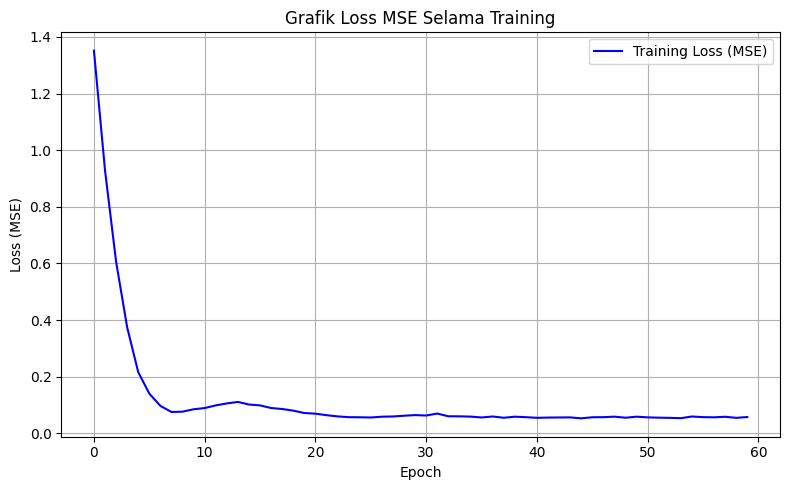

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss (MSE)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss MSE Selama Training')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.3821,  3.1465],
        [-0.5123,  2.9210],
        [-0.6181,  2.6985],
        [-0.6417,  2.4757],
        [-0.6399,  2.2526],
        [-0.5657,  2.0314],
        [-0.5253,  1.8105],
        [-0.4197,  1.5980],
        [-0.3015,  1.3865],
        [-0.1788,  1.1707]])
tensor([[-0.5841,  1.0840],
        [-0.4969,  0.9796],
        [-0.4283,  0.8788],
        [-0.3516,  0.7777],
        [-0.2912,  0.6812]])
tensor([-0.3260,  1.1668])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.36436316 0.62551476 0.01012208]
 [0.32217408 0.66489153 0.01293439]
 [0.28956025 0.69398846 0.01645129]
 [0.2813639  0.69728008 0.02135601]
 [0.28000666 0.69209939 0.02789396]
 [0.29855758 0.66443977 0.03700265]
 [0.30676153 0.64480725 0.04843122]
 [0.33328588 0.6033651  0.06334902]
 [0.36253565 0.55533795 0.08212641]
 [0.39089207 0.50335439 0.10575354]]
[[0.27137246 0.61989216 0.10873538]
 [0.29007056 0.58574495 0.12418449]
 [0.30358207 0.55634331 0.14007462]
 [0.31857988 0.52382544 0.15759468]
 [0.32862926 0.49606237 0.17530838]]
[[0.34633562 0.54919659 0.1044678 ]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1)              # [1, 2, 3, ..., 12]
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # [13, 14, 15, 16]
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # [17]

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11]
Waktu plot testing: [12 13 14 15 16]
Waktu plot future: [17]


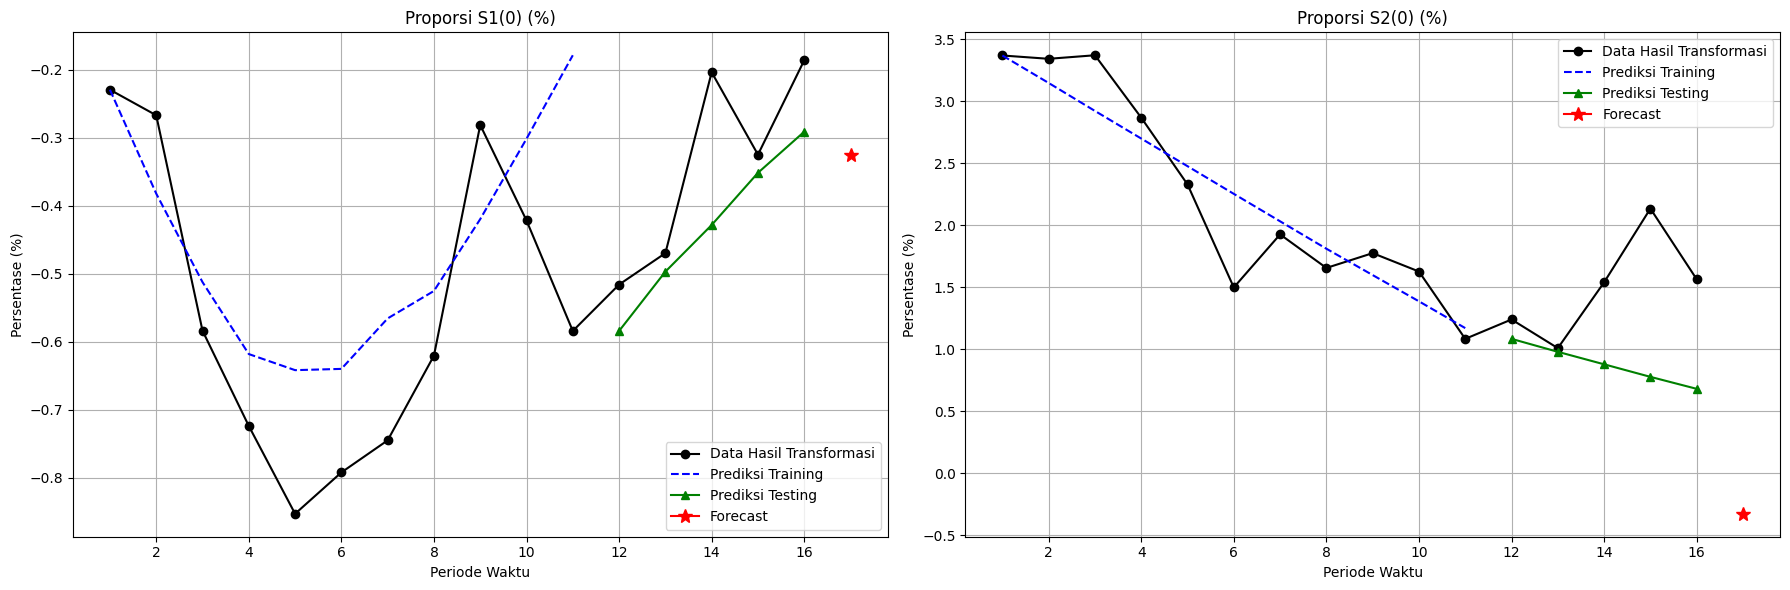

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

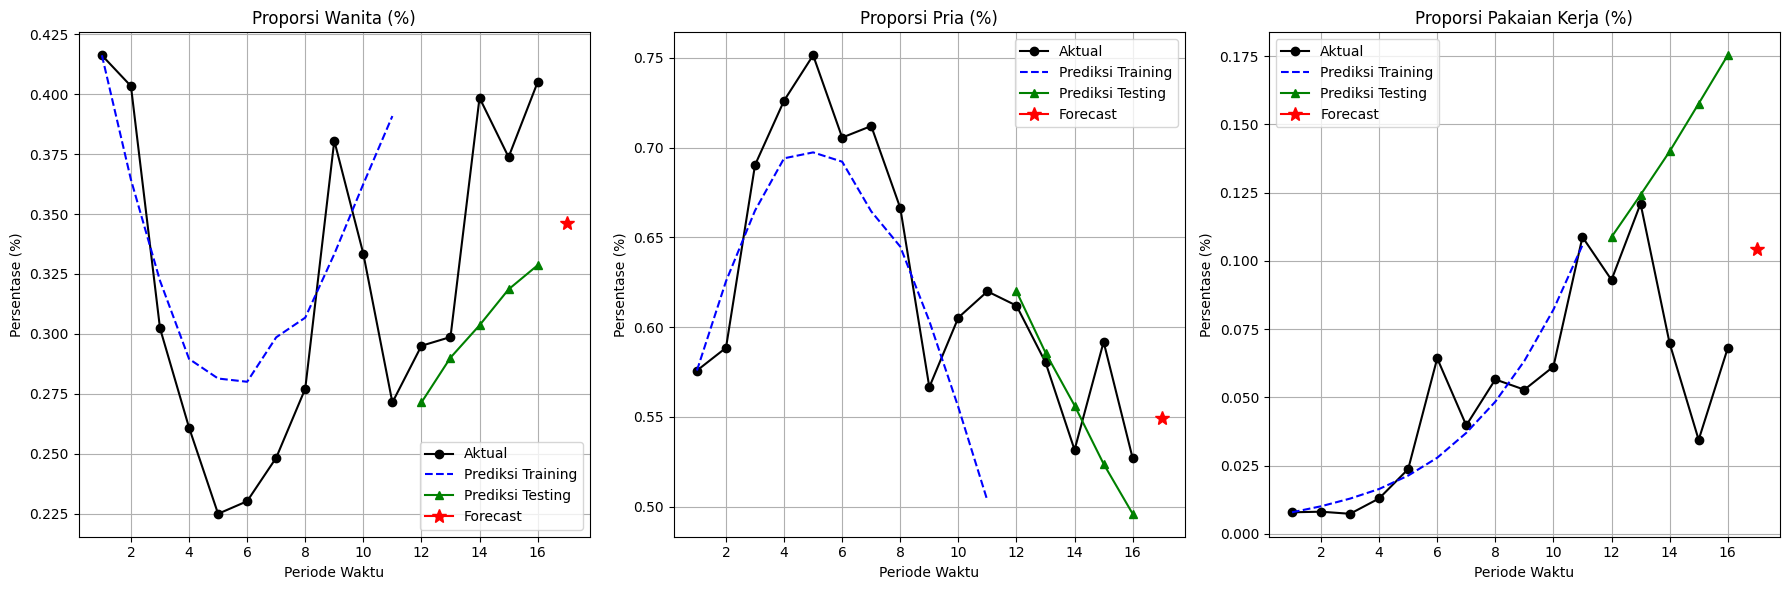

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # [11, 12, 13]
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [14, 15, 16]
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 15.40%

MAPE pada Data Testing: 48.52%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 15.47%
MAPE Testing Wanita: 13.67%
MAPE Training Pria: 6.09%
MAPE Testing Pria: 4.84%
MAPE Training Pakaian Kerja: 24.65%
MAPE Testing Pakaian Kerja: 127.04%


## 65% Data Uji 35% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.65 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267]])
tensor([[-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])
tensor([1.0000, 1.0400, 1.0800, 1.1200, 1.1600, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(3, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(3, 32),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
            )

    def forward(self, t, z):
        t_tensor = torch.ones_like(z[..., :1]) * t
        zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)

        ilr1 = self.branch_wp(zt)
        ilr2 = self.branch_pk(zt)
        return torch.cat([ilr1, ilr2], dim=-1)  # Output shape: (batch, 2)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = mse_loss(pred, S_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}")


print("Training selesai!")

Epoch 0, Train Loss: 0.9878
Epoch 10, Train Loss: 0.0773
Epoch 20, Train Loss: 0.0972
Epoch 30, Train Loss: 0.0653
Epoch 40, Train Loss: 0.0539
Epoch 50, Train Loss: 0.0517
Epoch 60, Train Loss: 0.0509
Epoch 70, Train Loss: 0.0494
Epoch 80, Train Loss: 0.0500
Epoch 90, Train Loss: 0.0506
Early stopped!
Training selesai!


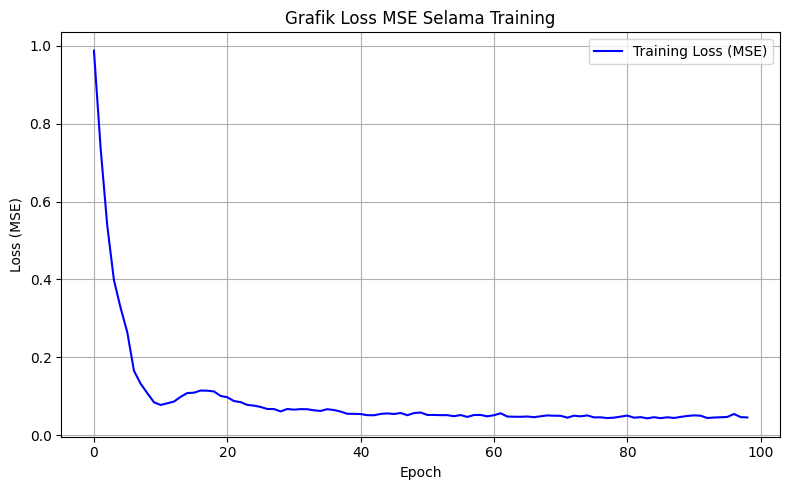

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss (MSE)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss MSE Selama Training')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.4248,  3.1012],
        [-0.6162,  2.8396],
        [-0.7407,  2.5882],
        [-0.8115,  2.3378],
        [-0.8402,  2.1107],
        [-0.7810,  1.9282],
        [-0.6805,  1.7936],
        [-0.5671,  1.6879],
        [-0.4443,  1.6566]])
tensor([[-0.4217,  1.6267],
        [-0.3990,  1.6090],
        [-0.3646,  1.5950],
        [-0.3101,  1.5790],
        [-0.2827,  1.6018],
        [-0.2443,  1.6131]])
tensor([-0.4483,  1.5841])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.35040742 0.63898753 0.01060506]
 [0.29085773 0.69525757 0.0138847 ]
 [0.25501886 0.72689456 0.01808658]
 [0.23518057 0.74098902 0.02383042]
 [0.22635565 0.74273341 0.03091094]
 [0.23915496 0.72167849 0.03916655]
 [0.26330958 0.68932977 0.04736065]
 [0.29247446 0.65226023 0.05526531]
 [0.32740163 0.61366756 0.05893081]]
[[0.33341157 0.60531914 0.06126929]
 [0.33980686 0.59739508 0.06279806]
 [0.34987601 0.58592861 0.06419538]
 [0.36624799 0.56781804 0.06593397]
 [0.37549679 0.56002584 0.06447737]
 [0.38795564 0.54809727 0.06394709]]
[[0.3244147  0.61157963 0.06400567]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1)              # [1, 2, 3, ..., 12]
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # [13, 14, 15, 16]
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # [17]

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10]
Waktu plot testing: [11 12 13 14 15 16]
Waktu plot future: [17]


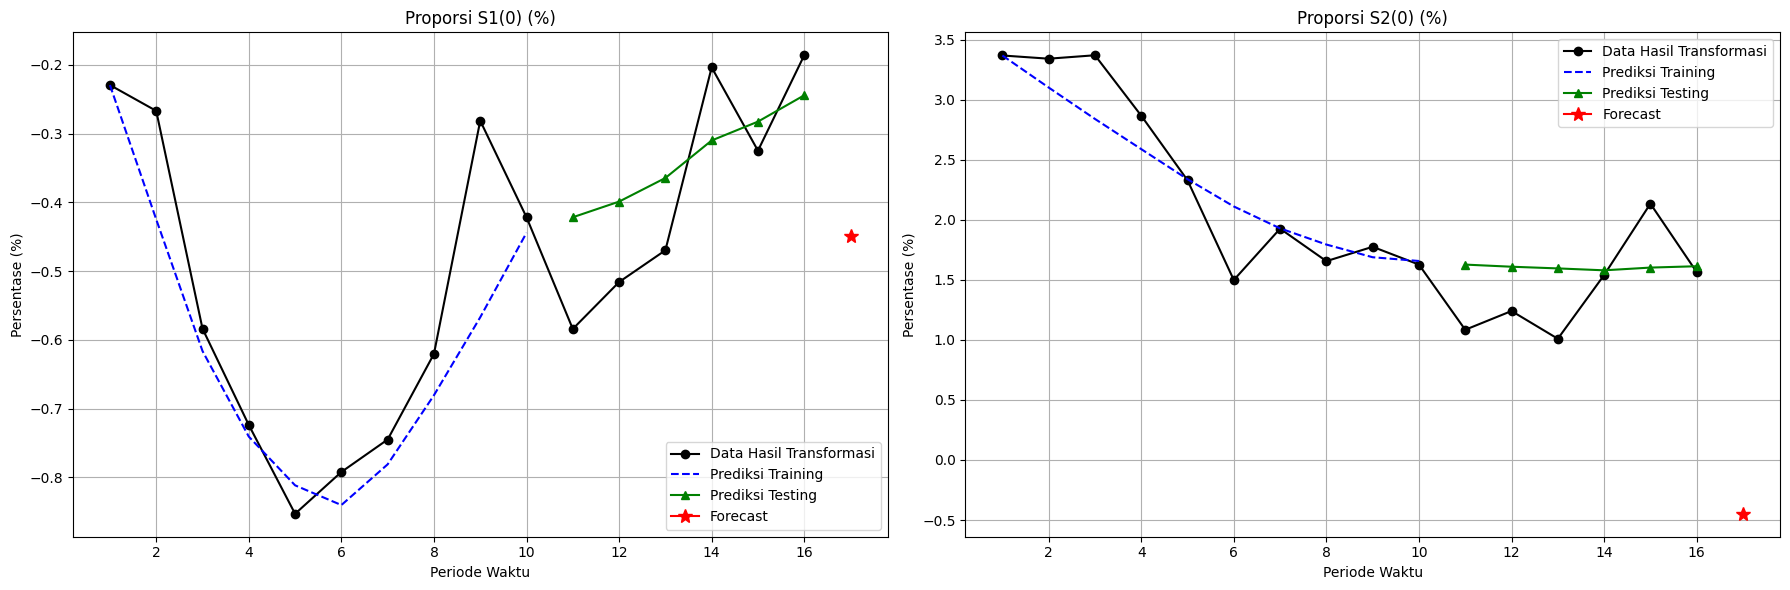

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

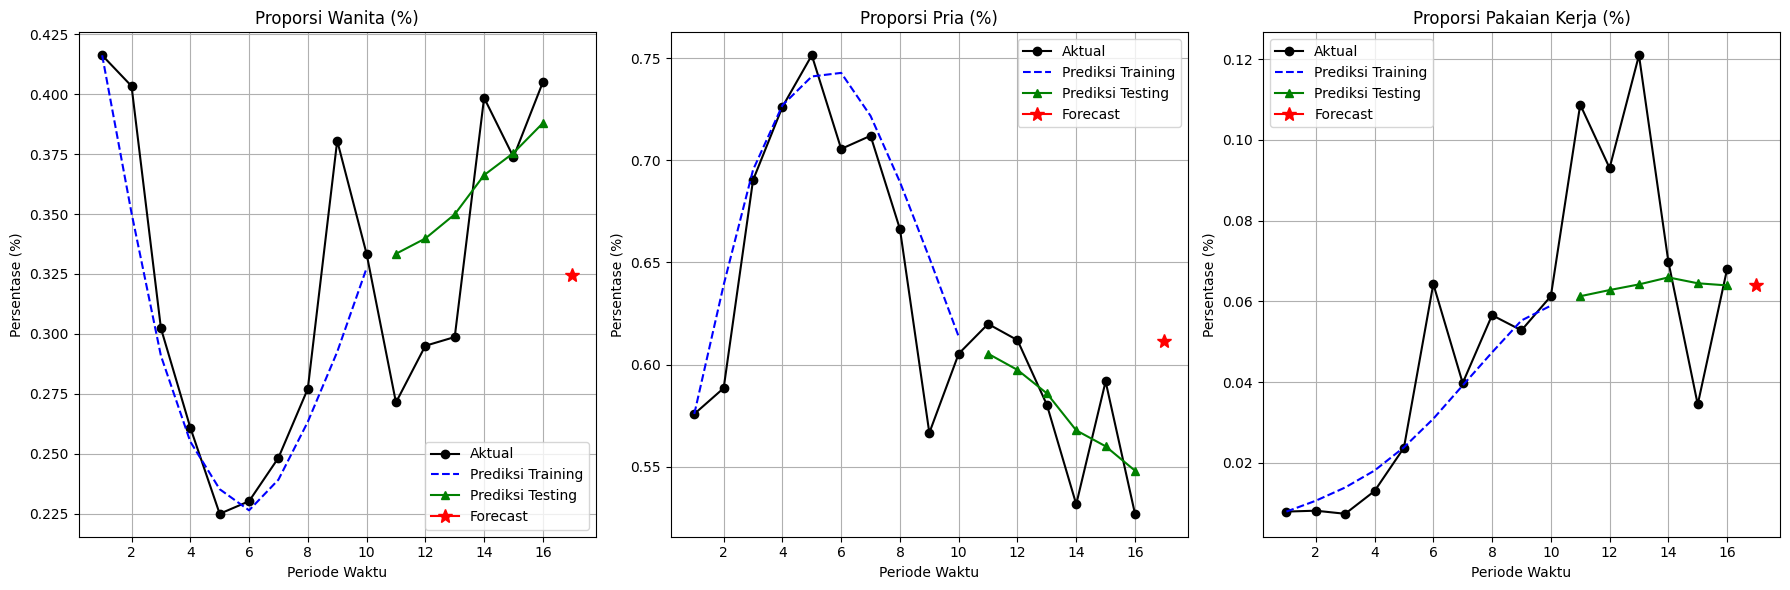

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # [11, 12, 13]
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [14, 15, 16]
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 11.09%

MAPE pada Data Testing: 17.31%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 5.90%
MAPE Testing Wanita: 11.33%
MAPE Training Pria: 3.74%
MAPE Testing Pria: 3.64%
MAPE Training Pakaian Kerja: 23.64%
MAPE Testing Pakaian Kerja: 36.96%


## 60% Data Uji 40% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.6 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749]])
tensor([[-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000])
tensor([1.0000, 1.0333, 1.0667, 1.1000, 1.1333, 1.1667, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(3, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(3, 32),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
            )

    def forward(self, t, z):
        t_tensor = torch.ones_like(z[..., :1]) * t
        zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)

        ilr1 = self.branch_wp(zt)
        ilr2 = self.branch_pk(zt)
        return torch.cat([ilr1, ilr2], dim=-1)  # Output shape: (batch, 2)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = mse_loss(pred, S_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}")


print("Training selesai!")

Epoch 0, Train Loss: 1.0133
Epoch 10, Train Loss: 0.1000
Epoch 20, Train Loss: 0.0748
Epoch 30, Train Loss: 0.0690
Epoch 40, Train Loss: 0.0549
Epoch 50, Train Loss: 0.0531
Epoch 60, Train Loss: 0.0541
Epoch 70, Train Loss: 0.0523
Early stopped!
Training selesai!


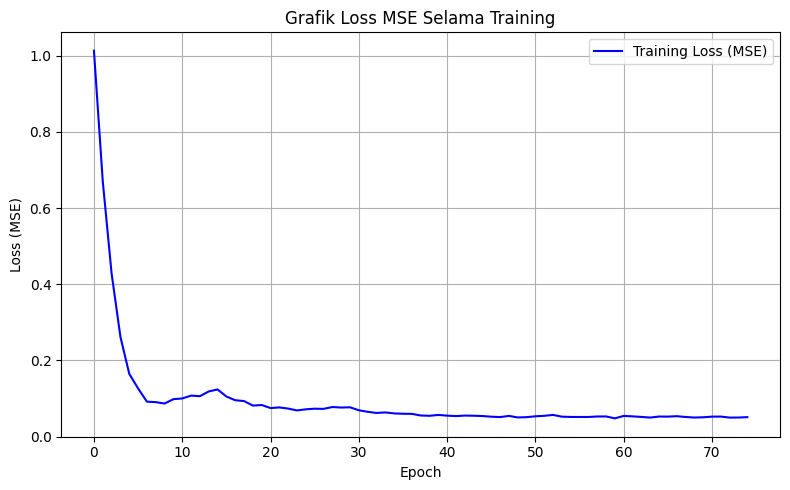

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss (MSE)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss MSE Selama Training')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.4193,  3.1175],
        [-0.6029,  2.8711],
        [-0.7422,  2.6445],
        [-0.8063,  2.3950],
        [-0.7908,  2.1498],
        [-0.7142,  1.9283],
        [-0.5551,  1.7189],
        [-0.4218,  1.5380]])
tensor([[-0.2814,  1.7749],
        [-0.2488,  1.7398],
        [-0.2121,  1.7016],
        [-0.1602,  1.6555],
        [-0.1106,  1.6133],
        [-0.0540,  1.5645],
        [-0.0066,  1.5178]])
tensor([-0.3799,  1.5538])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.35224065 0.63735058 0.01040877]
 [0.29487932 0.69170362 0.01341706]
 [0.25492638 0.72818023 0.01689339]
 [0.23685629 0.74084771 0.022296  ]
 [0.2389109  0.7310543  0.0300348 ]
 [0.25627816 0.70369178 0.04003006]
 [0.29647413 0.65004683 0.05347904]
 [0.33105778 0.60111662 0.06782561]]
[[0.38059459 0.5665833  0.05282211]
 [0.39012586 0.55464128 0.05523285]
 [0.40091514 0.54113247 0.05795238]
 [0.41636339 0.52224446 0.06139215]
 [0.43117378 0.50418593 0.06464029]
 [0.44797625 0.48352368 0.06850006]
 [0.46169238 0.46602309 0.07228453]]
[[0.34405601 0.58882501 0.06711898]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1)              # [1, 2, 3, ..., 12]
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # [13, 14, 15, 16]
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # [17]

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [1 2 3 4 5 6 7 8 9]
Waktu plot testing: [10 11 12 13 14 15 16]
Waktu plot future: [17]


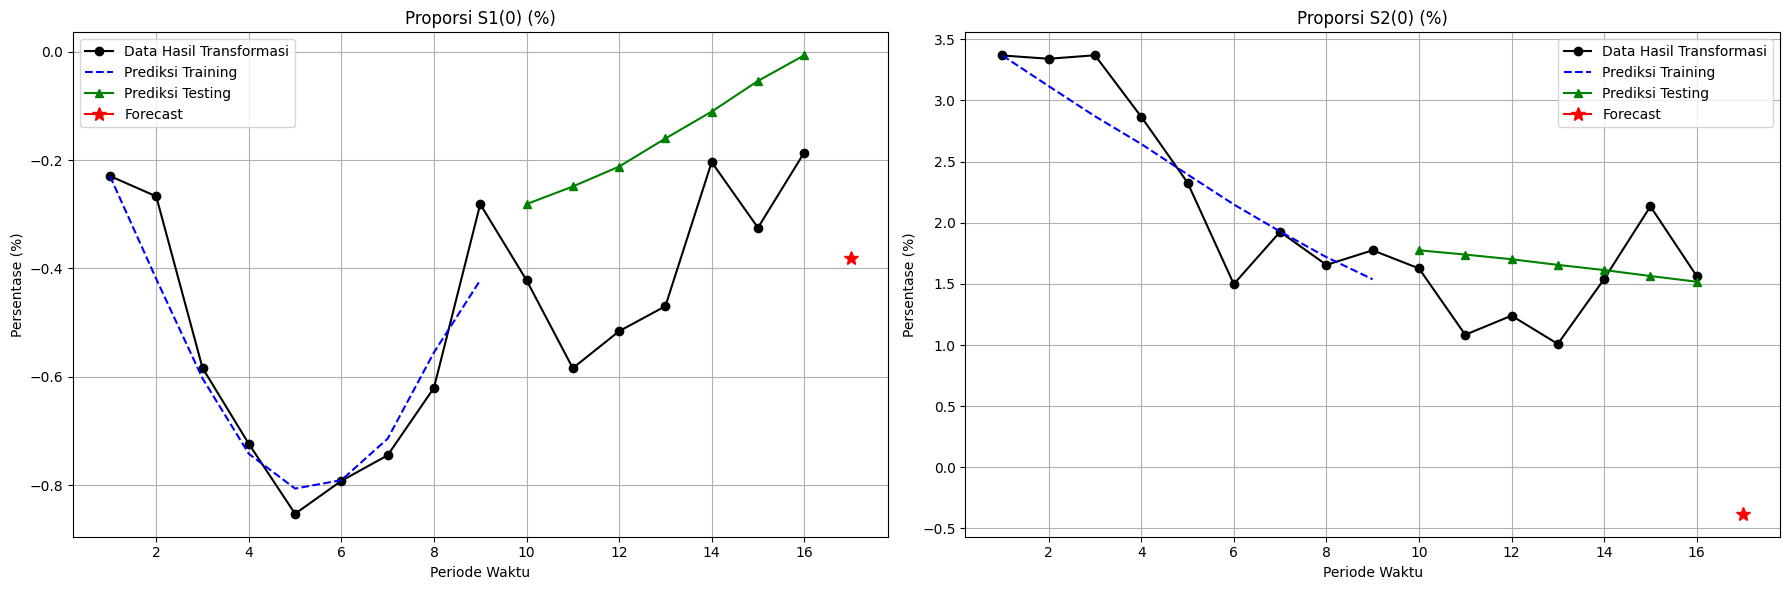

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

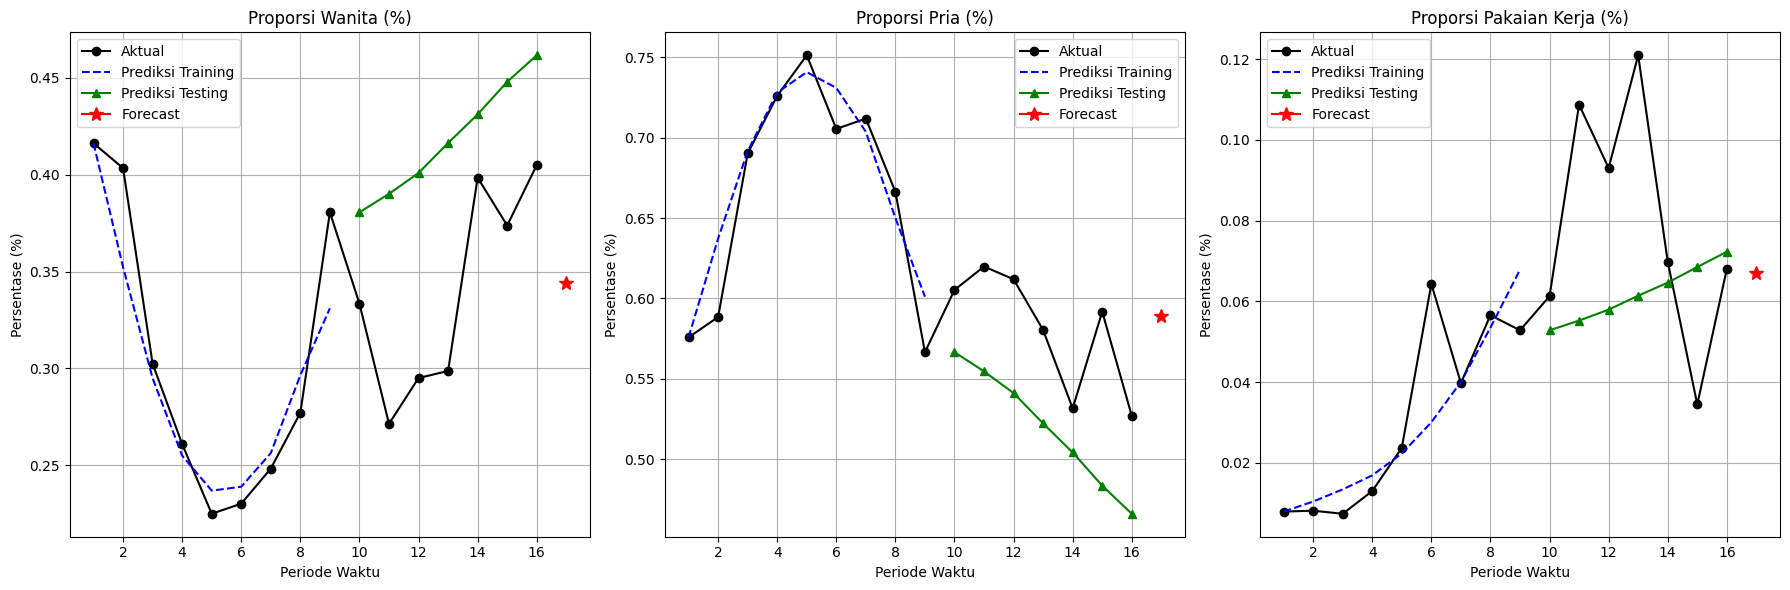

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # [11, 12, 13]
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [14, 15, 16]
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 11.38%

MAPE pada Data Testing: 24.35%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 5.53%
MAPE Testing Wanita: 25.04%
MAPE Training Pria: 2.61%
MAPE Testing Pria: 10.51%
MAPE Training Pakaian Kerja: 25.98%
MAPE Testing Pakaian Kerja: 37.50%


# FORECAST II #

## 90% Data Uji 10% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.9 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396]])
tensor([[-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.0769, 0.1538, 0.2308, 0.3077, 0.3846, 0.4615, 0.5385, 0.6154,
        0.6923, 0.7692, 0.8462, 0.9231, 1.0000])
tensor([1.0000, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(7, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32,16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(7, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.LayerNorm(32),
            nn.Tanh(),
            nn.Linear(32, 1)
            )

    def forward(self, t, z):
      t_tensor = torch.ones_like(z[..., :1]) * t
      zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)
      t_tensor = torch.ones_like(z[..., :1]) * t
      t2_tensor = t_tensor ** 2
      t3_tensor = t_tensor ** 3
      sin_t = torch.sin(2 * np.pi * t_tensor)
      cos_t = torch.cos(2 * np.pi * t_tensor)
    # Gabungkan semua fitur waktu dengan z
      zt = torch.cat([z, t_tensor, t2_tensor, t3_tensor, sin_t, cos_t], dim=-1)

      ilr1 = self.branch_wp(zt)
      ilr2 = self.branch_pk(zt)
      return torch.cat([ilr1, ilr2], dim=-1)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
weights = torch.tensor([1.0, 4.0])

def weighted_mse_loss(pred, target, weights):
    loss = (pred - target) ** 2  # shape (batch, 3)
    weighted_loss = loss * weights  # broadcasting (batch, 3)
    return weighted_loss.mean()

# MSE Per Kategori
def mse_per_category(pred, target):
    return torch.mean((pred - target) ** 2, dim=0)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history_total = []
loss_history_ilr1 = []
loss_history_ilr2 = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = weighted_mse_loss(pred, S_train, weights=torch.tensor([1.0, 4.0]))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    ilr_losses = mse_per_category(pred, S_train)
    loss_history_ilr1.append(ilr_losses[0].item())
    loss_history_ilr2.append(ilr_losses[1].item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        per_cat_loss = mse_per_category(pred, S_train)
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Per-Kategori: {per_cat_loss.tolist()}")


print("Training selesai!")

Epoch 0, Loss: 5.5828, Per-Kategori: [0.18893660604953766, 2.744185209274292]
Epoch 10, Loss: 0.3142, Per-Kategori: [0.07089715451002121, 0.13939665257930756]
Epoch 20, Loss: 0.2703, Per-Kategori: [0.030007878318428993, 0.127639040350914]
Epoch 30, Loss: 0.2373, Per-Kategori: [0.02651626244187355, 0.11204291880130768]
Epoch 40, Loss: 0.1684, Per-Kategori: [0.016464663669466972, 0.08008933067321777]
Epoch 50, Loss: 0.1617, Per-Kategori: [0.014948545955121517, 0.07709432393312454]
Epoch 60, Loss: 0.1576, Per-Kategori: [0.01553686149418354, 0.07491546869277954]
Epoch 70, Loss: 0.1516, Per-Kategori: [0.011470981873571873, 0.07291285693645477]
Epoch 80, Loss: 0.1424, Per-Kategori: [0.018469372764229774, 0.0665997639298439]
Epoch 90, Loss: 0.1556, Per-Kategori: [0.02792106196284294, 0.07080794870853424]
Epoch 100, Loss: 0.1196, Per-Kategori: [0.017306488007307053, 0.05547181889414787]
Epoch 110, Loss: 0.1169, Per-Kategori: [0.01662389375269413, 0.05430639535188675]
Epoch 120, Loss: 0.1142, P

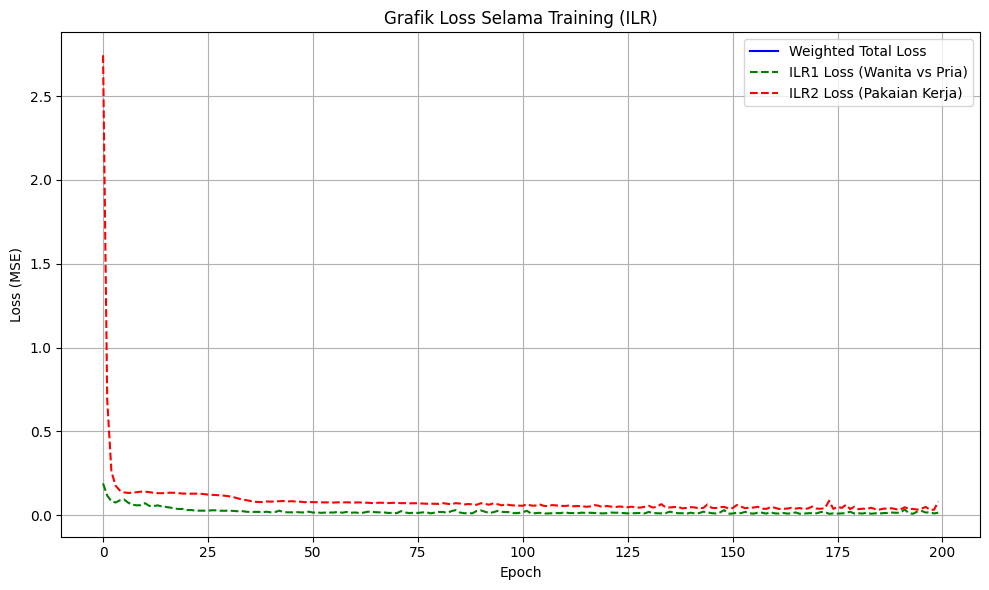

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(10, 6))
plt.plot(loss_history_total, label='Weighted Total Loss', color='blue')
plt.plot(loss_history_ilr1, label='ILR1 Loss (Wanita vs Pria)', color='green', linestyle='--')
plt.plot(loss_history_ilr2, label='ILR2 Loss (Pakaian Kerja)', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss Selama Training (ILR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.3851,  3.2793],
        [-0.5501,  3.1343],
        [-0.6828,  2.7356],
        [-0.7486,  2.3103],
        [-0.6834,  1.9200],
        [-0.5739,  1.7664],
        [-0.4475,  1.6492],
        [-0.4210,  1.5258],
        [-0.4267,  1.3915],
        [-0.4756,  1.2465],
        [-0.4327,  1.0988],
        [-0.3185,  1.0228],
        [-0.1937,  1.3384]])
tensor([[-0.2038,  1.5396],
        [ 0.2394,  2.4476]])
tensor([-0.1498,  1.2319])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.36395974 0.62742903 0.00861124]
 [0.31163588 0.67846809 0.00989603]
 [0.27149219 0.71307809 0.01542972]
 [0.25109186 0.7237386  0.02516954]
 [0.26433114 0.694856   0.04081287]
 [0.29206757 0.65756065 0.05037177]
 [0.32625236 0.61434596 0.05940169]
 [0.33095975 0.60026023 0.06878001]
 [0.32526384 0.59472921 0.08000695]
 [0.30642346 0.60038299 0.09319354]
 [0.31273277 0.57670585 0.11056138]
 [0.34166537 0.53604516 0.12228948]
 [0.3940409  0.51822643 0.08773267]]
[[0.39850771 0.531648   0.06984429]
 [0.56981746 0.4061737  0.02400883]]
[[0.40291955 0.49799692 0.09908353]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1) # []
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # []
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # []

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Waktu plot testing: [15 16]
Waktu plot future: [17]


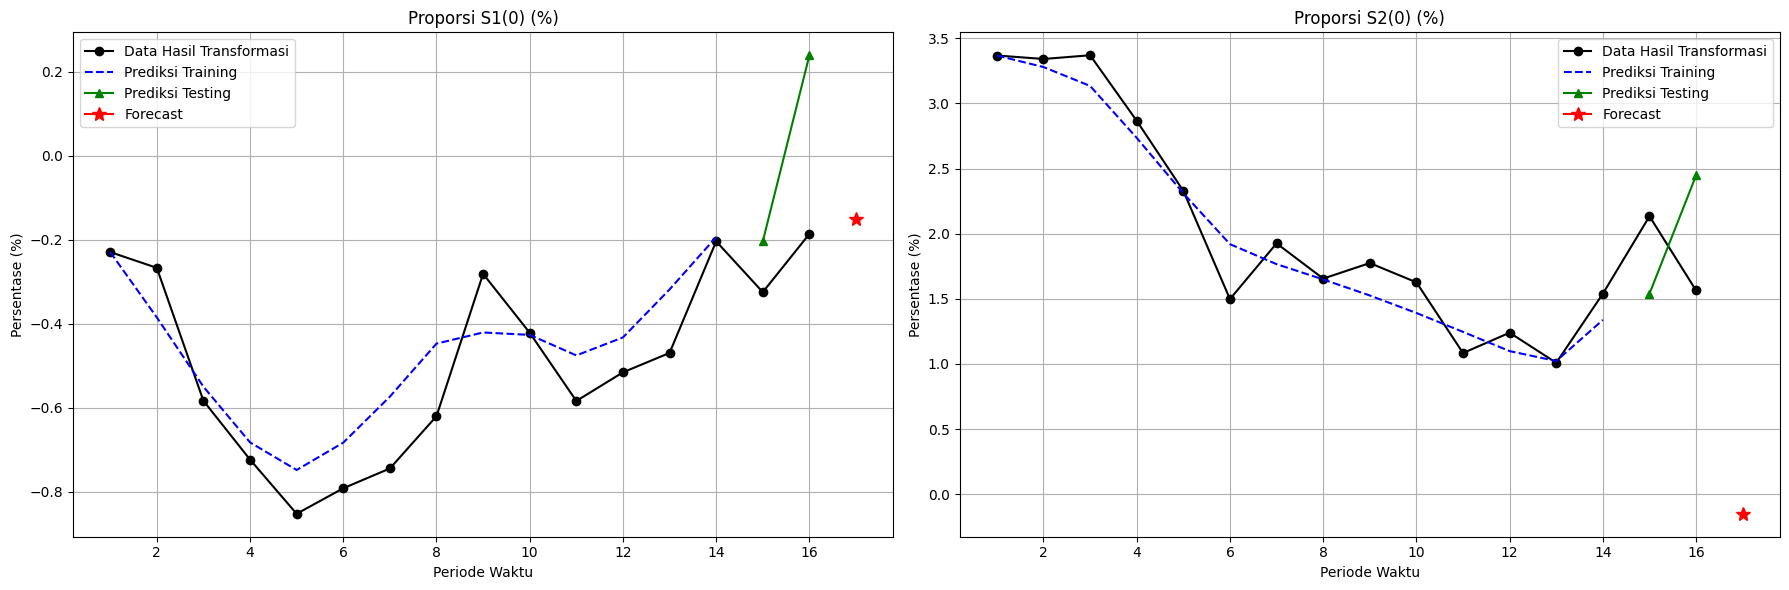

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

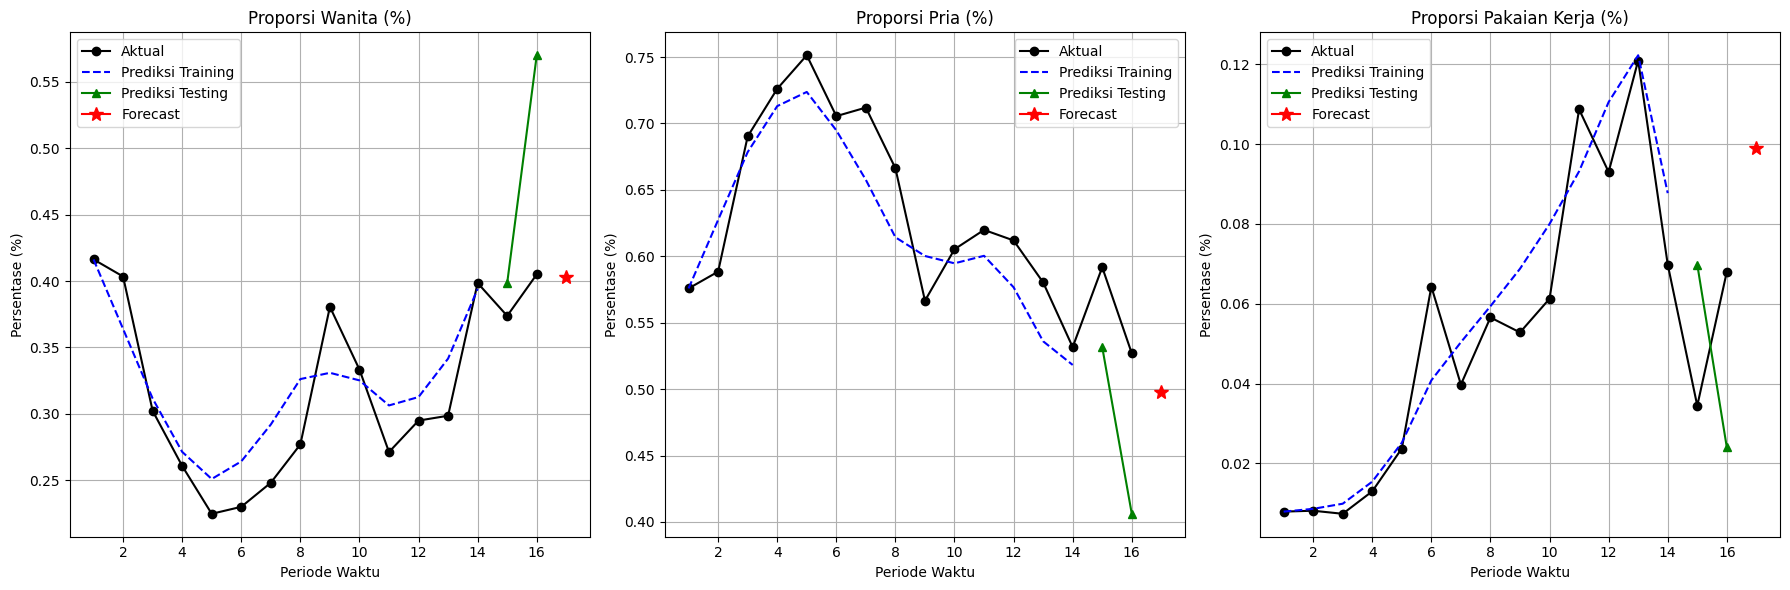

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode )
    axs[i].plot(
        t_train_plot,  # []
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode )
    axs[i].plot(
        t_test_plot,   # []
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode )
    axs[i].plot(
        t_future_plot, # []
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 10.48%

MAPE pada Data Testing: 41.29%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 9.19%
MAPE Testing Wanita: 23.66%
MAPE Training Pria: 4.11%
MAPE Testing Pria: 16.54%
MAPE Training Pakaian Kerja: 18.13%
MAPE Testing Pakaian Kerja: 83.69%


## 85% Data Uji 15% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.85 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092]])
tensor([[-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.0833, 0.1667, 0.2500, 0.3333, 0.4167, 0.5000, 0.5833, 0.6667,
        0.7500, 0.8333, 0.9167, 1.0000])
tensor([1.0000, 1.1000, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(7, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32,16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(7, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.LayerNorm(32),
            nn.Tanh(),
            nn.Linear(32, 1)
            )

    def forward(self, t, z):
      t_tensor = torch.ones_like(z[..., :1]) * t
      zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)
      t_tensor = torch.ones_like(z[..., :1]) * t
      t2_tensor = t_tensor ** 2
      t3_tensor = t_tensor ** 3
      sin_t = torch.sin(2 * np.pi * t_tensor)
      cos_t = torch.cos(2 * np.pi * t_tensor)
    # Gabungkan semua fitur waktu dengan z
      zt = torch.cat([z, t_tensor, t2_tensor, t3_tensor, sin_t, cos_t], dim=-1)

      ilr1 = self.branch_wp(zt)
      ilr2 = self.branch_pk(zt)
      return torch.cat([ilr1, ilr2], dim=-1)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
weights = torch.tensor([1.0, 4.0])

def weighted_mse_loss(pred, target, weights):
    loss = (pred - target) ** 2  # shape (batch, 3)
    weighted_loss = loss * weights  # broadcasting (batch, 3)
    return weighted_loss.mean()

# MSE Per Kategori
def mse_per_category(pred, target):
    return torch.mean((pred - target) ** 2, dim=0)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history_total = []
loss_history_ilr1 = []
loss_history_ilr2 = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = weighted_mse_loss(pred, S_train, weights=torch.tensor([1.0, 4.0]))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    ilr_losses = mse_per_category(pred, S_train)
    loss_history_ilr1.append(ilr_losses[0].item())
    loss_history_ilr2.append(ilr_losses[1].item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        per_cat_loss = mse_per_category(pred, S_train)
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Per-Kategori: {per_cat_loss.tolist()}")


print("Training selesai!")

Epoch 0, Loss: 3.8310, Per-Kategori: [0.08086173981428146, 1.8952765464782715]
Epoch 10, Loss: 0.1901, Per-Kategori: [0.03289509564638138, 0.08680860698223114]
Epoch 20, Loss: 0.1826, Per-Kategori: [0.013413995504379272, 0.08793100714683533]
Epoch 30, Loss: 0.1673, Per-Kategori: [0.01260717585682869, 0.08049320429563522]
Epoch 40, Loss: 0.1421, Per-Kategori: [0.007469829637557268, 0.06915920227766037]
Epoch 50, Loss: 0.1333, Per-Kategori: [0.007616526447236538, 0.06475041806697845]
Epoch 60, Loss: 0.1350, Per-Kategori: [0.010021998547017574, 0.0649959146976471]
Epoch 70, Loss: 0.1265, Per-Kategori: [0.007914702408015728, 0.06124687194824219]
Epoch 80, Loss: 0.1339, Per-Kategori: [0.007519572041928768, 0.06505029648542404]
Epoch 90, Loss: 0.1153, Per-Kategori: [0.007442444562911987, 0.05580209940671921]
Epoch 100, Loss: 0.1087, Per-Kategori: [0.008832750841975212, 0.05216062813997269]
Epoch 110, Loss: 0.1001, Per-Kategori: [0.011106489226222038, 0.047255001962184906]
Epoch 120, Loss: 0.

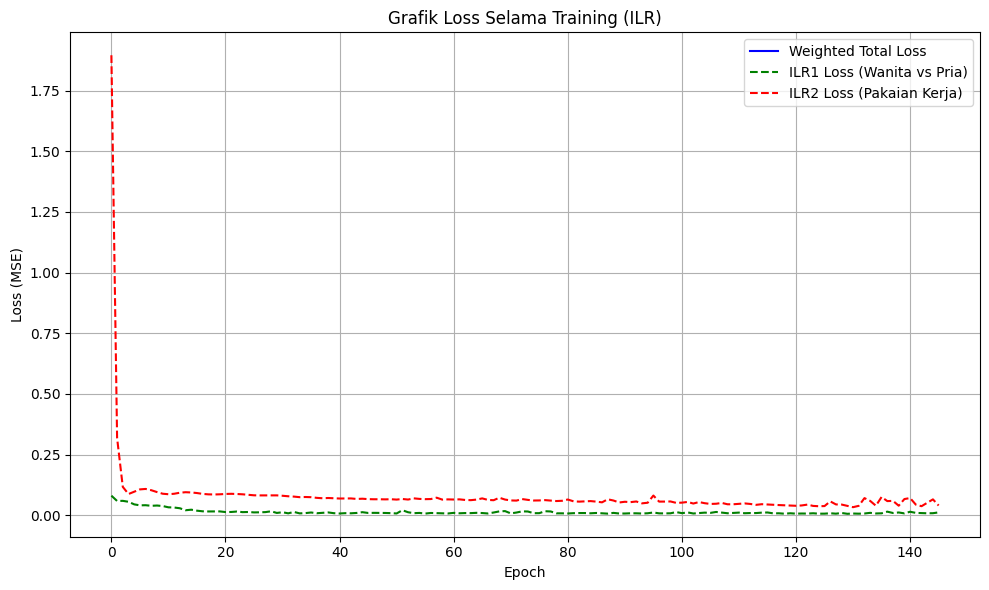

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(10, 6))
plt.plot(loss_history_total, label='Weighted Total Loss', color='blue')
plt.plot(loss_history_ilr1, label='ILR1 Loss (Wanita vs Pria)', color='green', linestyle='--')
plt.plot(loss_history_ilr2, label='ILR2 Loss (Pakaian Kerja)', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss Selama Training (ILR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.3978,  3.2705],
        [-0.5634,  3.1742],
        [-0.7074,  2.8342],
        [-0.8083,  2.4360],
        [-0.8025,  2.0376],
        [-0.7083,  1.7275],
        [-0.5988,  1.6551],
        [-0.5524,  1.5525],
        [-0.5443,  1.4270],
        [-0.5740,  1.2888],
        [-0.5819,  1.1456],
        [-0.5973,  0.9907]])
tensor([[-0.4697,  1.0092],
        [-0.5361,  0.8169],
        [-0.5751,  0.6134]])
tensor([-0.5688,  0.8804])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.35980873 0.63150894 0.00868233]
 [0.30778844 0.68281593 0.00939563]
 [0.26521815 0.72118893 0.01359292]
 [0.23661368 0.74217431 0.02121202]
 [0.23495475 0.730879   0.03416625]
 [0.25498207 0.69429817 0.05071977]
 [0.28300457 0.66006215 0.05693328]
 [0.29369729 0.64147509 0.06482762]
 [0.29279784 0.63226046 0.0749417 ]
 [0.28078483 0.6322938  0.08692137]
 [0.27411625 0.62419448 0.10168927]
 [0.26450796 0.61556284 0.1199292 ]]
[[0.2986766  0.58035905 0.12096435]
 [0.27235868 0.58132995 0.14631136]
 [0.25227374 0.56898012 0.17874614]]
[[0.26709283 0.59705627 0.1358509 ]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1) # []
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # []
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # []

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Waktu plot testing: [14 15 16]
Waktu plot future: [17]


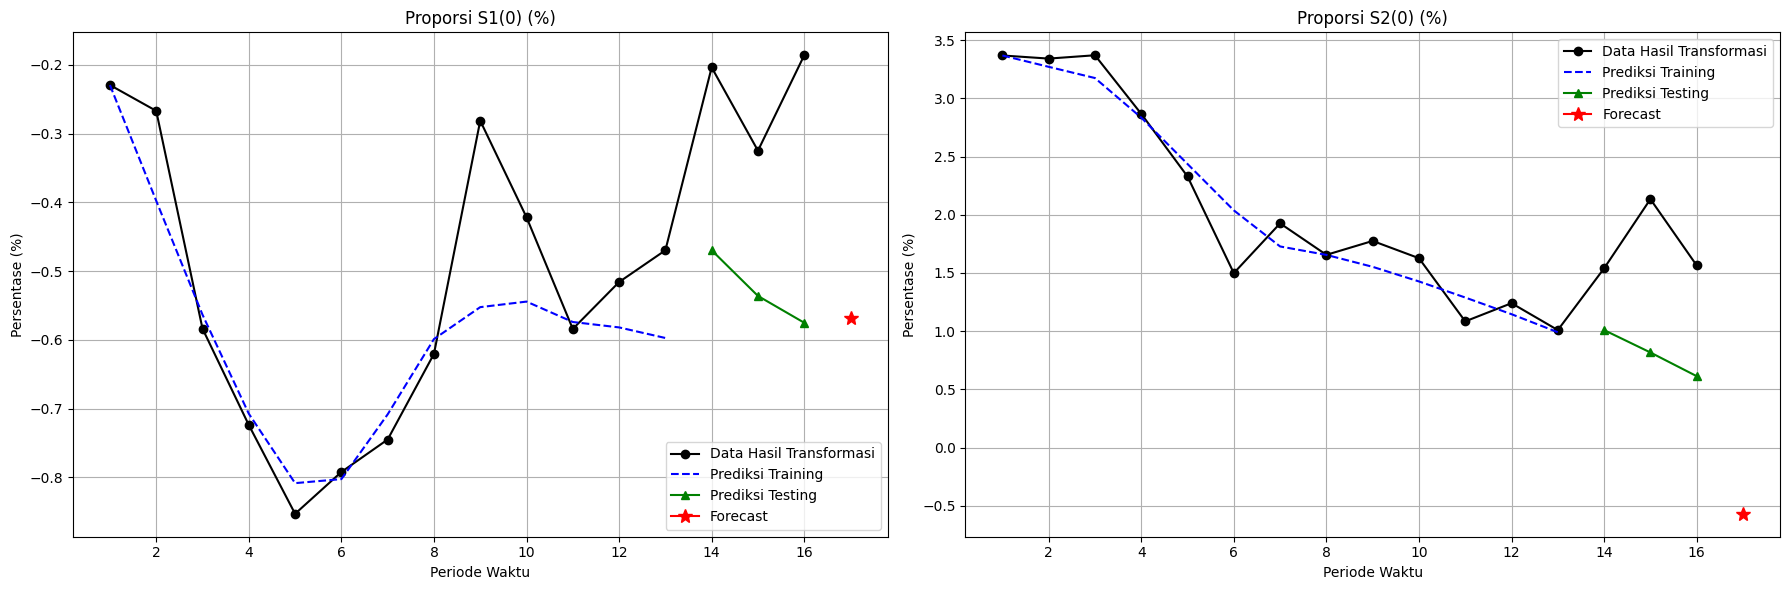

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

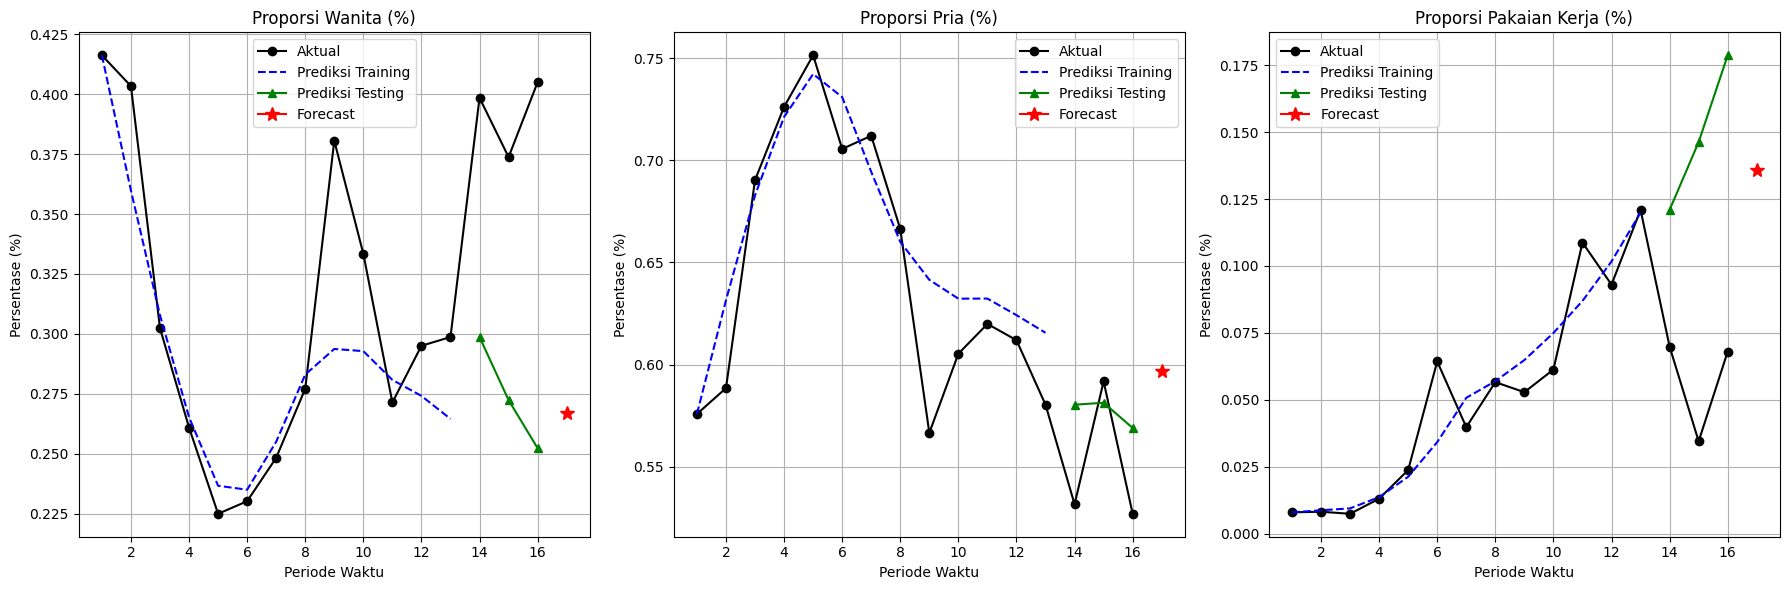

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode )
    axs[i].plot(
        t_train_plot,  # []
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode )
    axs[i].plot(
        t_test_plot,   # []
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode )
    axs[i].plot(
        t_future_plot, # []
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 8.41%

MAPE pada Data Testing: 74.38%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 6.41%
MAPE Testing Wanita: 29.96%
MAPE Training Pria: 3.46%
MAPE Testing Pria: 6.30%
MAPE Training Pakaian Kerja: 15.36%
MAPE Testing Pakaian Kerja: 186.87%


## 80% Data Uji 20% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.8 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402]])
tensor([[-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.0909, 0.1818, 0.2727, 0.3636, 0.4545, 0.5455, 0.6364, 0.7273,
        0.8182, 0.9091, 1.0000])
tensor([1.0000, 1.0667, 1.1333, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(7, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32,16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(7, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.LayerNorm(32),
            nn.Tanh(),
            nn.Linear(32, 1)
            )

    def forward(self, t, z):
      t_tensor = torch.ones_like(z[..., :1]) * t
      zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)
      t_tensor = torch.ones_like(z[..., :1]) * t
      t2_tensor = t_tensor ** 2
      t3_tensor = t_tensor ** 3
      sin_t = torch.sin(2 * np.pi * t_tensor)
      cos_t = torch.cos(2 * np.pi * t_tensor)
    # Gabungkan semua fitur waktu dengan z
      zt = torch.cat([z, t_tensor, t2_tensor, t3_tensor, sin_t, cos_t], dim=-1)

      ilr1 = self.branch_wp(zt)
      ilr2 = self.branch_pk(zt)
      return torch.cat([ilr1, ilr2], dim=-1)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
weights = torch.tensor([1.0, 4.0])

def weighted_mse_loss(pred, target, weights):
    loss = (pred - target) ** 2  # shape (batch, 3)
    weighted_loss = loss * weights  # broadcasting (batch, 3)
    return weighted_loss.mean()

# MSE Per Kategori
def mse_per_category(pred, target):
    return torch.mean((pred - target) ** 2, dim=0)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history_total = []
loss_history_ilr1 = []
loss_history_ilr2 = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = weighted_mse_loss(pred, S_train, weights=torch.tensor([1.0, 4.0]))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    ilr_losses = mse_per_category(pred, S_train)
    loss_history_ilr1.append(ilr_losses[0].item())
    loss_history_ilr2.append(ilr_losses[1].item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        per_cat_loss = mse_per_category(pred, S_train)
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Per-Kategori: {per_cat_loss.tolist()}")


print("Training selesai!")

Epoch 0, Loss: 4.0741, Per-Kategori: [0.10650355368852615, 2.0104281902313232]
Epoch 10, Loss: 0.2591, Per-Kategori: [0.04250967875123024, 0.1189097985625267]
Epoch 20, Loss: 0.2051, Per-Kategori: [0.022797802463173866, 0.09684804081916809]
Epoch 30, Loss: 0.1902, Per-Kategori: [0.017932811751961708, 0.09062657505273819]
Epoch 40, Loss: 0.1811, Per-Kategori: [0.010270469821989536, 0.0879906713962555]
Epoch 50, Loss: 0.1660, Per-Kategori: [0.01125099416822195, 0.08016834408044815]
Epoch 60, Loss: 0.1524, Per-Kategori: [0.009276107884943485, 0.07389026135206223]
Epoch 70, Loss: 0.1462, Per-Kategori: [0.009831025265157223, 0.07064644247293472]
Epoch 80, Loss: 0.1390, Per-Kategori: [0.01916777901351452, 0.06471647322177887]
Epoch 90, Loss: 0.1213, Per-Kategori: [0.006555462256073952, 0.05898672714829445]
Epoch 100, Loss: 0.1123, Per-Kategori: [0.0060378145426511765, 0.05463845655322075]
Epoch 110, Loss: 0.0960, Per-Kategori: [0.006239652633666992, 0.04643595218658447]
Epoch 120, Loss: 0.09

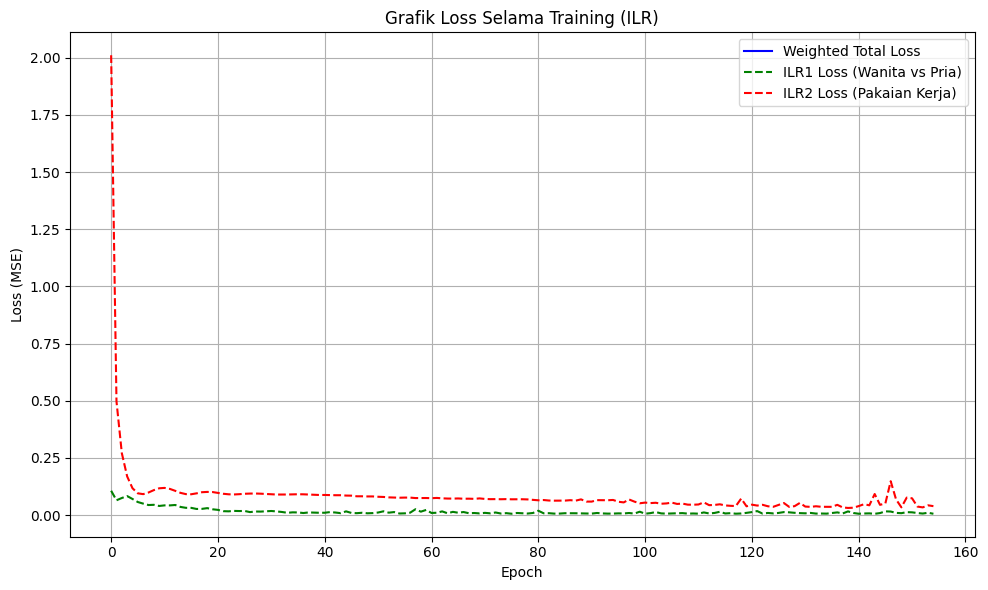

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(10, 6))
plt.plot(loss_history_total, label='Weighted Total Loss', color='blue')
plt.plot(loss_history_ilr1, label='ILR1 Loss (Wanita vs Pria)', color='green', linestyle='--')
plt.plot(loss_history_ilr2, label='ILR2 Loss (Pakaian Kerja)', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss Selama Training (ILR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.4004,  3.2880],
        [-0.5647,  3.1650],
        [-0.7144,  2.7513],
        [-0.8220,  2.3130],
        [-0.7944,  1.8864],
        [-0.7113,  1.7399],
        [-0.6003,  1.6820],
        [-0.5376,  1.6059],
        [-0.4706,  1.5039],
        [-0.5307,  1.3915],
        [-0.6521,  1.2595]])
tensor([[-0.5159,  1.2402],
        [-0.6101,  1.1354],
        [-0.7057,  1.0223],
        [-0.7925,  0.9001]])
tensor([-0.5993,  1.1884])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.3590257  0.63247825 0.00849605]
 [0.30736187 0.68314086 0.00949727]
 [0.26290997 0.72209976 0.01499027]
 [0.23238911 0.74315539 0.0244555 ]
 [0.23531402 0.72373616 0.04094982]
 [0.25439008 0.69566209 0.04994783]
 [0.28312042 0.66171143 0.05516814]
 [0.29907749 0.63973052 0.06119199]
 [0.31578033 0.61439672 0.06982295]
 [0.29560545 0.62613051 0.07826404]
 [0.25947115 0.6525406  0.08798825]]
[[0.29502297 0.61194792 0.09302911]
 [0.26645992 0.63143096 0.10210912]
 [0.23901297 0.64842559 0.11256144]
 [0.21511763 0.65977899 0.12510338]]
[[0.2709877  0.63244    0.09657229]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1) # []
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # []
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # []

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Waktu plot testing: [13 14 15 16]
Waktu plot future: [17]


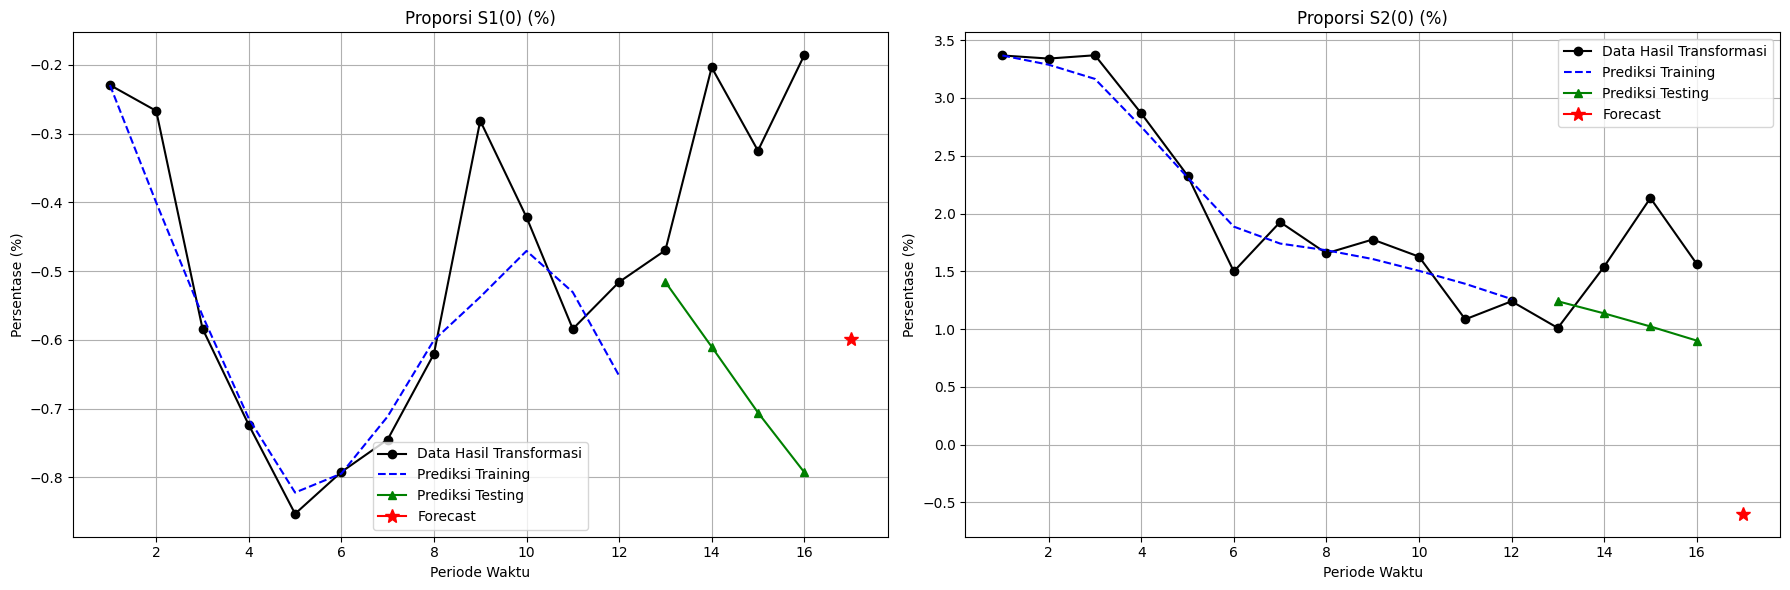

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

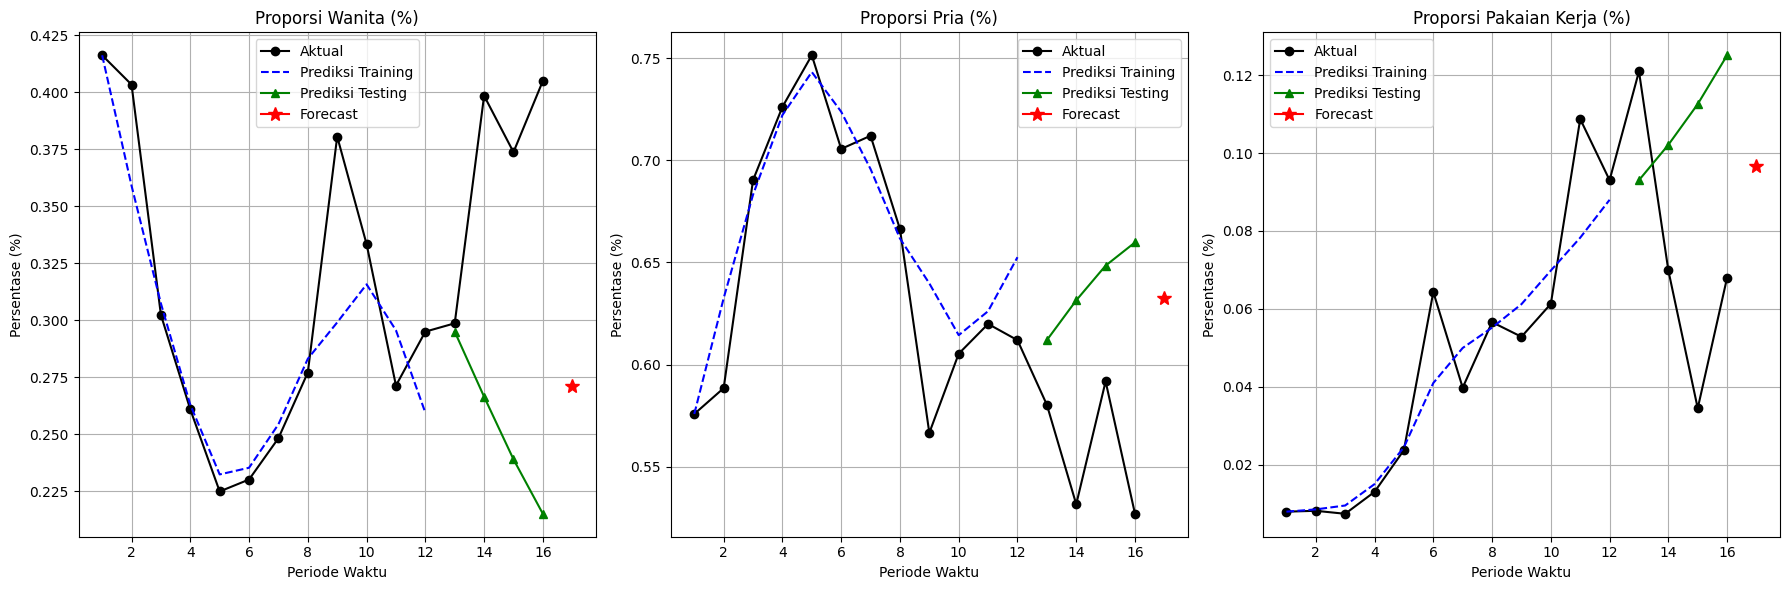

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode )
    axs[i].plot(
        t_train_plot,  # []
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode )
    axs[i].plot(
        t_test_plot,   # []
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode )
    axs[i].plot(
        t_future_plot, # []
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 8.01%

MAPE pada Data Testing: 46.35%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 5.94%
MAPE Testing Wanita: 29.32%
MAPE Training Pria: 3.15%
MAPE Testing Pria: 14.75%
MAPE Training Pakaian Kerja: 14.95%
MAPE Testing Pakaian Kerja: 94.97%


## 70% Data Uji 30% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.7 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267],
        [-0.5841,  1.0840]])
tensor([[-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
tensor([1.0000, 1.0500, 1.1000, 1.1500, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(7, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32,16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(7, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.LayerNorm(32),
            nn.Tanh(),
            nn.Linear(32, 1)
            )

    def forward(self, t, z):
      t_tensor = torch.ones_like(z[..., :1]) * t
      zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)
      t_tensor = torch.ones_like(z[..., :1]) * t
      t2_tensor = t_tensor ** 2
      t3_tensor = t_tensor ** 3
      sin_t = torch.sin(2 * np.pi * t_tensor)
      cos_t = torch.cos(2 * np.pi * t_tensor)
    # Gabungkan semua fitur waktu dengan z
      zt = torch.cat([z, t_tensor, t2_tensor, t3_tensor, sin_t, cos_t], dim=-1)

      ilr1 = self.branch_wp(zt)
      ilr2 = self.branch_pk(zt)
      return torch.cat([ilr1, ilr2], dim=-1)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
weights = torch.tensor([1.0, 4.0])

def weighted_mse_loss(pred, target, weights):
    loss = (pred - target) ** 2  # shape (batch, 3)
    weighted_loss = loss * weights  # broadcasting (batch, 3)
    return weighted_loss.mean()

# MSE Per Kategori
def mse_per_category(pred, target):
    return torch.mean((pred - target) ** 2, dim=0)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history_total = []
loss_history_ilr1 = []
loss_history_ilr2 = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = weighted_mse_loss(pred, S_train, weights=torch.tensor([1.0, 4.0]))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    ilr_losses = mse_per_category(pred, S_train)
    loss_history_ilr1.append(ilr_losses[0].item())
    loss_history_ilr2.append(ilr_losses[1].item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        per_cat_loss = mse_per_category(pred, S_train)
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Per-Kategori: {per_cat_loss.tolist()}")


print("Training selesai!")

Epoch 0, Loss: 2.6949, Per-Kategori: [0.12397124618291855, 1.3164502382278442]
Epoch 10, Loss: 0.2133, Per-Kategori: [0.04194160923361778, 0.09614071995019913]
Epoch 20, Loss: 0.1884, Per-Kategori: [0.017185930162668228, 0.08990953117609024]
Epoch 30, Loss: 0.1802, Per-Kategori: [0.008773545734584332, 0.08790883421897888]
Epoch 40, Loss: 0.1683, Per-Kategori: [0.008409653790295124, 0.08206058293581009]
Epoch 50, Loss: 0.1553, Per-Kategori: [0.0077498420141637325, 0.07570905983448029]
Epoch 60, Loss: 0.1455, Per-Kategori: [0.008846118114888668, 0.07053942233324051]
Epoch 70, Loss: 0.1340, Per-Kategori: [0.00834787730127573, 0.06492442637681961]
Epoch 80, Loss: 0.1125, Per-Kategori: [0.0067373919300735, 0.0545756071805954]
Epoch 90, Loss: 0.0945, Per-Kategori: [0.00558662973344326, 0.04587831348180771]
Epoch 100, Loss: 0.0868, Per-Kategori: [0.006152335088700056, 0.04187110438942909]
Epoch 110, Loss: 0.1186, Per-Kategori: [0.011646021157503128, 0.05638793483376503]
Epoch 120, Loss: 0.109

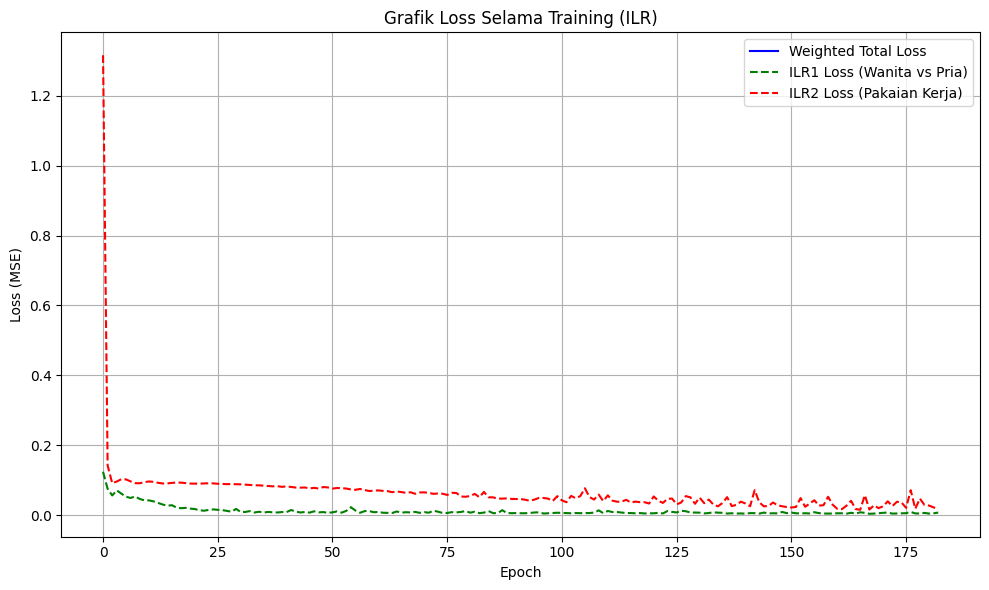

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(10, 6))
plt.plot(loss_history_total, label='Weighted Total Loss', color='blue')
plt.plot(loss_history_ilr1, label='ILR1 Loss (Wanita vs Pria)', color='green', linestyle='--')
plt.plot(loss_history_ilr2, label='ILR2 Loss (Pakaian Kerja)', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss Selama Training (ILR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.3940,  3.3873],
        [-0.5621,  3.2056],
        [-0.7162,  2.7039],
        [-0.8320,  2.2026],
        [-0.7810,  1.7092],
        [-0.6447,  1.6814],
        [-0.4933,  1.6929],
        [-0.3694,  1.6330],
        [-0.3648,  1.4325],
        [-0.4826,  1.0039]])
tensor([[-0.5841,  1.0840],
        [-0.6624,  0.8381],
        [-0.7161,  0.5932],
        [-0.7967,  0.3478],
        [-0.8641,  0.1027]])
tensor([-0.4142,  0.9278])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.36145183 0.6310088  0.00753937]
 [0.308294   0.68265812 0.00904788]
 [0.26220082 0.72193716 0.01586202]
 [0.22911121 0.74309335 0.02779544]
 [0.23629502 0.71310321 0.05060178]
 [0.2710014  0.67446689 0.05453171]
 [0.31375881 0.63031197 0.05592922]
 [0.34942606 0.58916876 0.06140518]
 [0.34494203 0.57782214 0.07723583]
 [0.2949553  0.58370277 0.12134193]]
[[0.27137246 0.61989216 0.10873538]
 [0.24247275 0.61875585 0.13877139]
 [0.21950736 0.60436159 0.17613105]
 [0.19109859 0.58966603 0.21923538]
 [0.16615464 0.56391744 0.26992792]]
[[0.30992247 0.55674095 0.13333658]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1) # []
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # []
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # []

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10 11]
Waktu plot testing: [12 13 14 15 16]
Waktu plot future: [17]


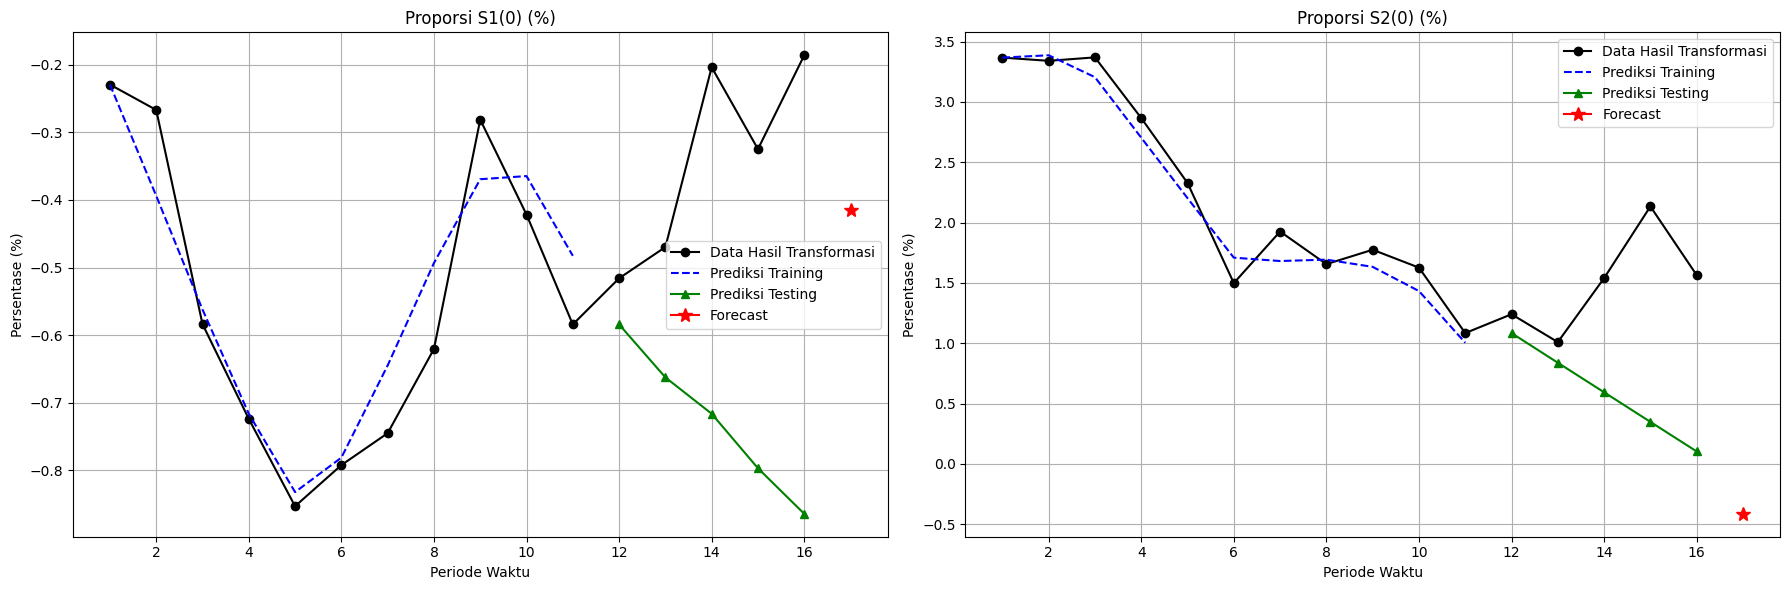

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

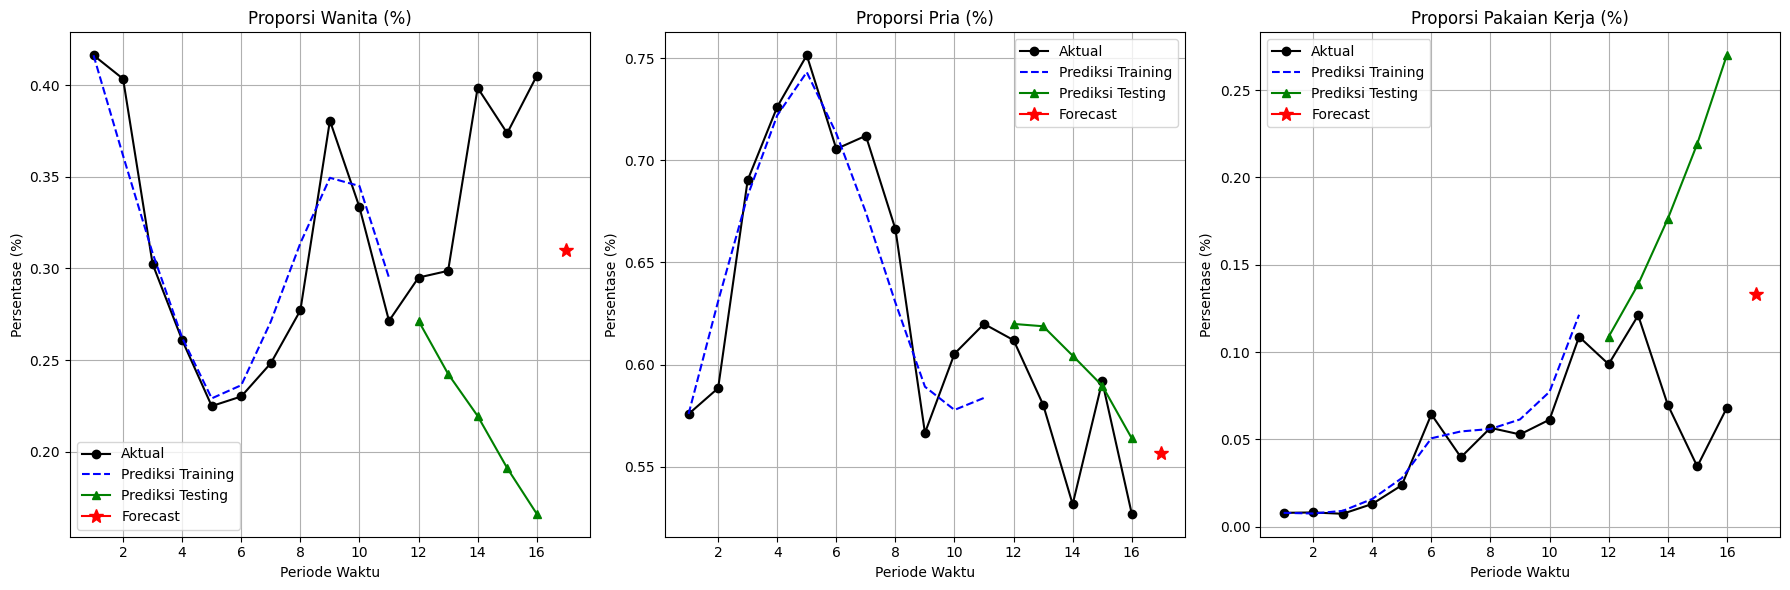

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode )
    axs[i].plot(
        t_train_plot,  # []
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode )
    axs[i].plot(
        t_test_plot,   # []
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode )
    axs[i].plot(
        t_future_plot, # []
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 8.46%

MAPE pada Data Testing: 81.70%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 5.46%
MAPE Testing Wanita: 35.92%
MAPE Training Pria: 3.28%
MAPE Testing Pria: 5.79%
MAPE Training Pakaian Kerja: 16.62%
MAPE Testing Pakaian Kerja: 203.38%


## 65% Data Uji 35% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.65 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749],
        [-0.4217,  1.6267]])
tensor([[-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])
tensor([1.0000, 1.0400, 1.0800, 1.1200, 1.1600, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(7, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32,16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(7, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.LayerNorm(32),
            nn.Tanh(),
            nn.Linear(32, 1)
            )

    def forward(self, t, z):
      t_tensor = torch.ones_like(z[..., :1]) * t
      zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)
      t_tensor = torch.ones_like(z[..., :1]) * t
      t2_tensor = t_tensor ** 2
      t3_tensor = t_tensor ** 3
      sin_t = torch.sin(2 * np.pi * t_tensor)
      cos_t = torch.cos(2 * np.pi * t_tensor)
    # Gabungkan semua fitur waktu dengan z
      zt = torch.cat([z, t_tensor, t2_tensor, t3_tensor, sin_t, cos_t], dim=-1)

      ilr1 = self.branch_wp(zt)
      ilr2 = self.branch_pk(zt)
      return torch.cat([ilr1, ilr2], dim=-1)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
weights = torch.tensor([1.0, 4.0])

def weighted_mse_loss(pred, target, weights):
    loss = (pred - target) ** 2  # shape (batch, 3)
    weighted_loss = loss * weights  # broadcasting (batch, 3)
    return weighted_loss.mean()

# MSE Per Kategori
def mse_per_category(pred, target):
    return torch.mean((pred - target) ** 2, dim=0)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history_total = []
loss_history_ilr1 = []
loss_history_ilr2 = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = weighted_mse_loss(pred, S_train, weights=torch.tensor([1.0, 4.0]))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    ilr_losses = mse_per_category(pred, S_train)
    loss_history_ilr1.append(ilr_losses[0].item())
    loss_history_ilr2.append(ilr_losses[1].item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        per_cat_loss = mse_per_category(pred, S_train)
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Per-Kategori: {per_cat_loss.tolist()}")


print("Training selesai!")

Epoch 0, Loss: 1.7135, Per-Kategori: [0.16012056171894073, 0.816728949546814]
Epoch 10, Loss: 0.2156, Per-Kategori: [0.04468129202723503, 0.09663588553667068]
Epoch 20, Loss: 0.1890, Per-Kategori: [0.01739819534122944, 0.09016866236925125]
Epoch 30, Loss: 0.1446, Per-Kategori: [0.013367041945457458, 0.06897436827421188]
Epoch 40, Loss: 0.0964, Per-Kategori: [0.007511681877076626, 0.046318523585796356]
Epoch 50, Loss: 0.0993, Per-Kategori: [0.015656795352697372, 0.045712996274232864]
Epoch 60, Loss: 0.0629, Per-Kategori: [0.006142249796539545, 0.029931223019957542]
Epoch 70, Loss: 0.0415, Per-Kategori: [0.00614528264850378, 0.019194718450307846]
Epoch 80, Loss: 0.0327, Per-Kategori: [0.005698585882782936, 0.014904387295246124]
Epoch 90, Loss: 0.0338, Per-Kategori: [0.004468541592359543, 0.015760313719511032]
Epoch 100, Loss: 0.0303, Per-Kategori: [0.0051392847672104836, 0.013847902417182922]
Epoch 110, Loss: 0.1032, Per-Kategori: [0.005656944587826729, 0.050182782113552094]
Early stoppe

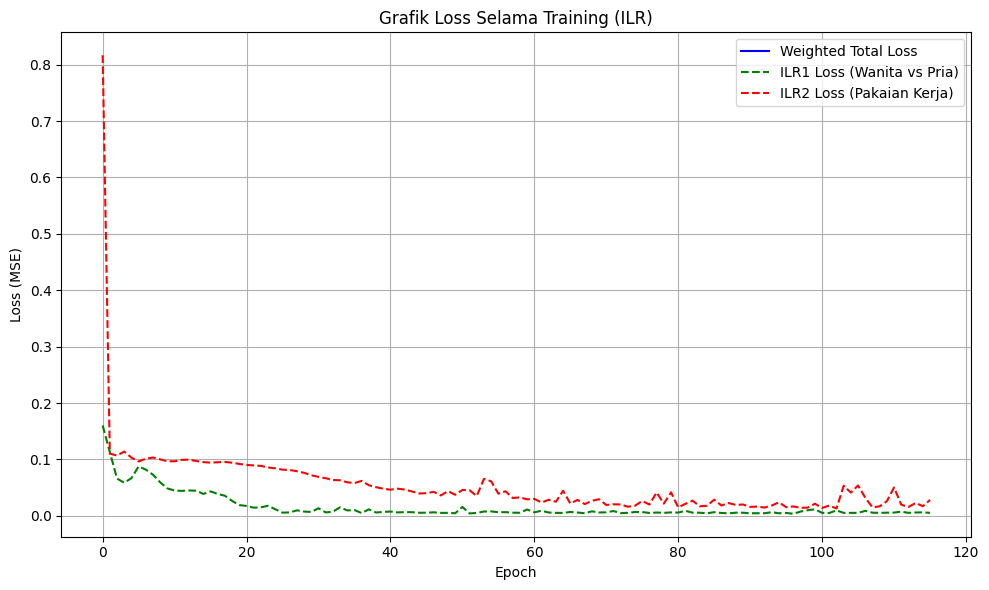

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(10, 6))
plt.plot(loss_history_total, label='Weighted Total Loss', color='blue')
plt.plot(loss_history_ilr1, label='ILR1 Loss (Wanita vs Pria)', color='green', linestyle='--')
plt.plot(loss_history_ilr2, label='ILR2 Loss (Pakaian Kerja)', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss Selama Training (ILR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.3848,  3.3829],
        [-0.5779,  3.3626],
        [-0.7449,  2.8402],
        [-0.8722,  2.2912],
        [-0.8658,  1.7393],
        [-0.7673,  1.6769],
        [-0.6112,  1.7057],
        [-0.4628,  1.7279],
        [-0.4446,  1.7501]])
tensor([[-0.4217,  1.6267],
        [-0.4297,  1.6331],
        [-0.4596,  1.6382],
        [-0.4957,  1.6433],
        [-0.5293,  1.6478],
        [-0.5741,  1.6506]])
tensor([-0.4022,  1.8028])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.36441647 0.62799028 0.00759325]
 [0.30405434 0.68850077 0.00744489]
 [0.25512814 0.73154221 0.01332965]
 [0.22001855 0.7553424  0.02463905]
 [0.21639028 0.73618536 0.04742436]
 [0.23920641 0.70801291 0.05278068]
 [0.28055533 0.66592935 0.05351532]
 [0.32347731 0.6224582  0.0540645 ]
 [0.32938341 0.6177281  0.05288849]]
[[0.33341157 0.60531914 0.06126929]
 [0.3311828  0.60808996 0.06072724]
 [0.32240566 0.61759044 0.06000391]
 [0.31196666 0.62884026 0.05919309]
 [0.30238015 0.63919253 0.05842732]
 [0.28977773 0.6526262  0.05759606]]
[[0.3433756  0.60646022 0.05016418]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1) # []
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # []
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # []

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [ 1  2  3  4  5  6  7  8  9 10]
Waktu plot testing: [11 12 13 14 15 16]
Waktu plot future: [17]


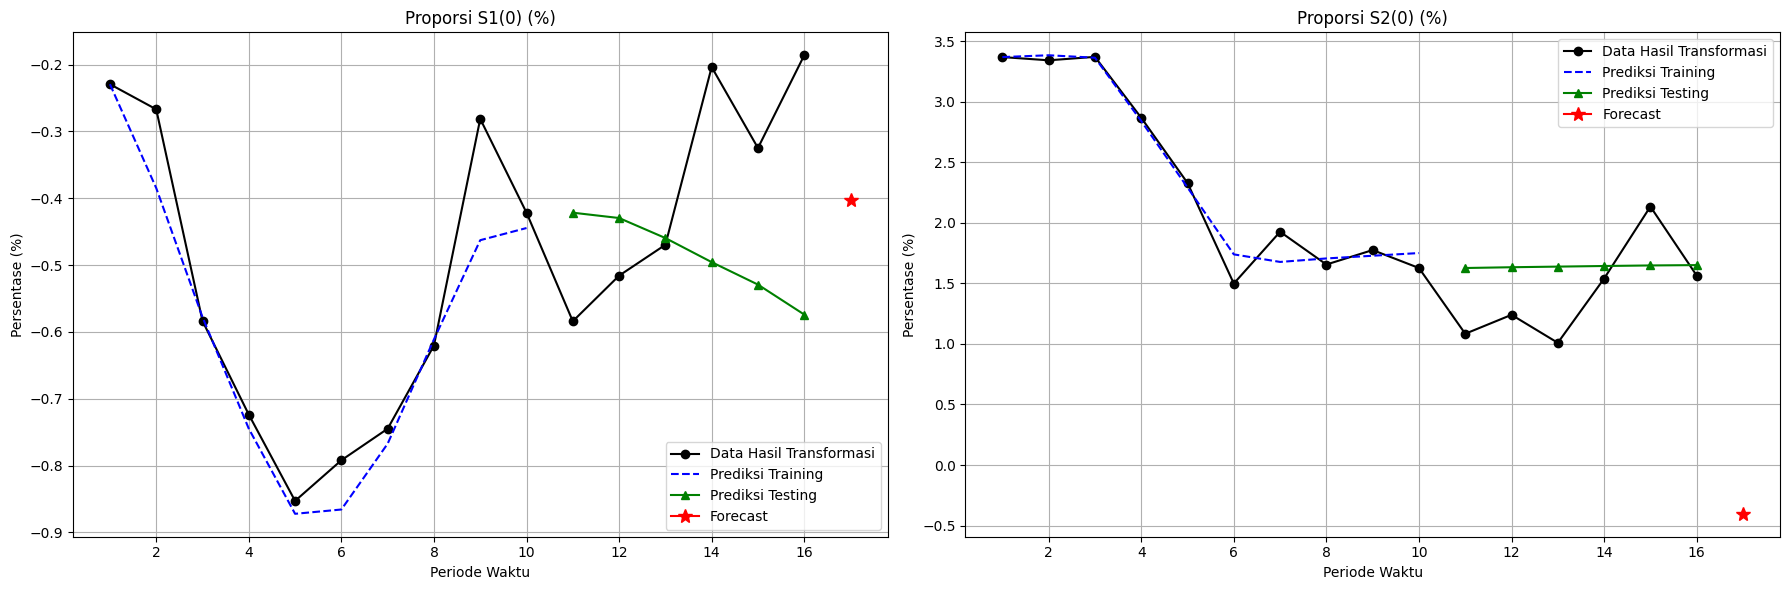

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

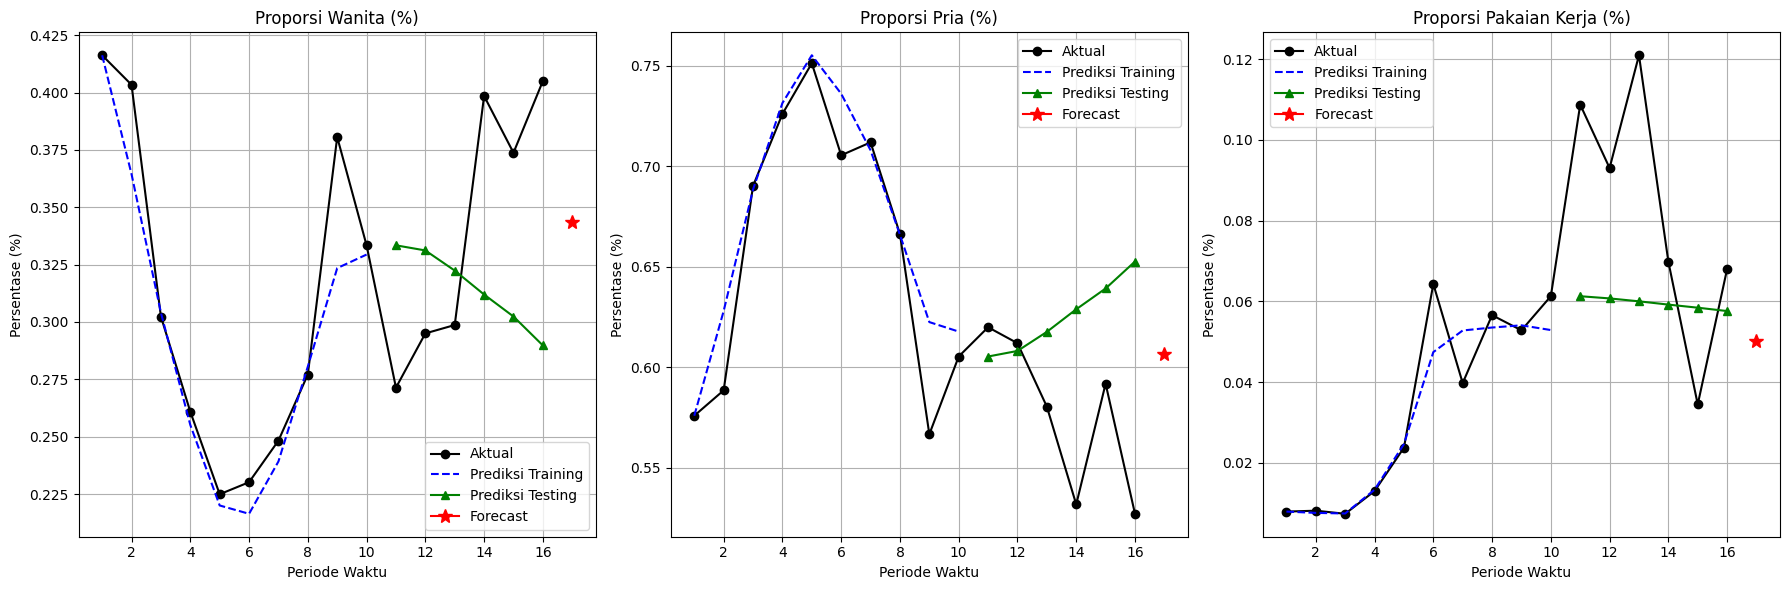

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode )
    axs[i].plot(
        t_train_plot,  # []
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode )
    axs[i].plot(
        t_test_plot,   # []
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode )
    axs[i].plot(
        t_future_plot, # []
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 5.38%

MAPE pada Data Testing: 22.26%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 4.17%
MAPE Testing Wanita: 18.72%
MAPE Training Pria: 2.51%
MAPE Testing Pria: 9.92%
MAPE Training Pakaian Kerja: 9.46%
MAPE Testing Pakaian Kerja: 38.15%


## 60% Data Uji 40% Data Latih ##

In [ ]:
# Pembagian data dan konversi ke tensor
train_size = int(0.6 * len(S_0))
test_size = len(S_0) - train_size

# Konversi ke tensor PyTorch
S_train = torch.tensor(S_0[:train_size], dtype=torch.float32)
S_test = torch.tensor(S_0[train_size:], dtype=torch.float32)
t_train = torch.linspace(0, 1, train_size)
t_test = torch.linspace(1, 1.2, test_size)
t_future = torch.linspace(1.3, 1.3, 1)  # satu titik waktu prediksi masa depan

In [ ]:
print(S_train)
print(S_test)
print(t_train)
print(t_test)
print(t_future)

tensor([[-0.2294,  3.3679],
        [-0.2670,  3.3412],
        [-0.5837,  3.3698],
        [-0.7238,  2.8668],
        [-0.8529,  2.3287],
        [-0.7921,  1.4984],
        [-0.7449,  1.9258],
        [-0.6204,  1.6555],
        [-0.2814,  1.7749]])
tensor([[-0.4217,  1.6267],
        [-0.5841,  1.0840],
        [-0.5159,  1.2402],
        [-0.4697,  1.0092],
        [-0.2038,  1.5396],
        [-0.3249,  2.1340],
        [-0.1862,  1.5644]])
tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000])
tensor([1.0000, 1.0333, 1.0667, 1.1000, 1.1333, 1.1667, 1.2000])
tensor([1.3000])


### ARSITEKTUR NMGM ###

In [ ]:
# Arsitektur NMGM dnegan NODE (branch)
class NMGM_SplitBranch(nn.Module):
    def __init__(self):
        super().__init__()

        # Branch untuk Wanita + Pria (ILR1)
        self.branch_wp = nn.Sequential(
            nn.Linear(7, 32),   # Lebih sedikit neuron
            nn.ReLU(),
            nn.Dropout(0.3),    # Saran 1: Dropout untuk regularisasi
            nn.Linear(32,16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

        # Branch untuk Pakaian Kerja (ILR2)
        self.branch_pk = nn.Sequential(
            nn.Linear(7, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.LayerNorm(32),
            nn.Tanh(),
            nn.Linear(32, 1)
            )

    def forward(self, t, z):
      t_tensor = torch.ones_like(z[..., :1]) * t
      zt = torch.cat([z, t_tensor], dim=-1)  # zt shape: (batch, 3)
      t_tensor = torch.ones_like(z[..., :1]) * t
      t2_tensor = t_tensor ** 2
      t3_tensor = t_tensor ** 3
      sin_t = torch.sin(2 * np.pi * t_tensor)
      cos_t = torch.cos(2 * np.pi * t_tensor)
    # Gabungkan semua fitur waktu dengan z
      zt = torch.cat([z, t_tensor, t2_tensor, t3_tensor, sin_t, cos_t], dim=-1)

      ilr1 = self.branch_wp(zt)
      ilr2 = self.branch_pk(zt)
      return torch.cat([ilr1, ilr2], dim=-1)

### TRAINING MODEL (OPTIMASI PARAMETER DENGAN ADJOINT METHOD & GRADIENT DESCENT) ###

In [ ]:
# Fungsi Loss MSE
def mse_loss(pred, true):
    return torch.mean((true - pred)**2)

In [ ]:
weights = torch.tensor([1.0, 4.0])

def weighted_mse_loss(pred, target, weights):
    loss = (pred - target) ** 2  # shape (batch, 3)
    weighted_loss = loss * weights  # broadcasting (batch, 3)
    return weighted_loss.mean()

# MSE Per Kategori
def mse_per_category(pred, target):
    return torch.mean((pred - target) ** 2, dim=0)

In [ ]:
# Step 6: Training dengan Adjoint Method
patience = 15
patience_counter = 0
best_test_loss = float('inf')

model = NMGM_SplitBranch()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_history_total = []
loss_history_ilr1 = []
loss_history_ilr2 = []

for epoch in range(200):
    optimizer.zero_grad()
    pred = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)
    loss = weighted_mse_loss(pred, S_train, weights=torch.tensor([1.0, 4.0]))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    ilr_losses = mse_per_category(pred, S_train)
    loss_history_ilr1.append(ilr_losses[0].item())
    loss_history_ilr2.append(ilr_losses[1].item())

    if loss.item() < best_test_loss:
      best_test_loss = loss.item()
      best_model_state = model.state_dict()
      patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopped!")
          break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        per_cat_loss = mse_per_category(pred, S_train)
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Per-Kategori: {per_cat_loss.tolist()}")


print("Training selesai!")

Epoch 0, Loss: 3.4006, Per-Kategori: [0.0762503370642662, 1.6812219619750977]
Epoch 10, Loss: 0.2144, Per-Kategori: [0.014073231257498264, 0.1036980152130127]
Epoch 20, Loss: 0.2052, Per-Kategori: [0.011714385822415352, 0.09964858740568161]
Epoch 30, Loss: 0.1948, Per-Kategori: [0.003204942913725972, 0.09660368412733078]
Epoch 40, Loss: 0.2021, Per-Kategori: [0.02615056000649929, 0.09449461102485657]
Epoch 50, Loss: 0.1554, Per-Kategori: [0.003731566248461604, 0.07677821069955826]
Epoch 60, Loss: 0.1042, Per-Kategori: [0.002626592991873622, 0.05142504349350929]
Epoch 70, Loss: 0.1087, Per-Kategori: [0.010348506271839142, 0.05173826217651367]
Epoch 80, Loss: 0.0539, Per-Kategori: [0.009072646498680115, 0.024686984717845917]
Epoch 90, Loss: 0.0358, Per-Kategori: [0.004817257169634104, 0.01667381078004837]
Epoch 100, Loss: 0.0299, Per-Kategori: [0.0034025043714791536, 0.014090698212385178]
Epoch 110, Loss: 0.0587, Per-Kategori: [0.0034607755951583385, 0.028504304587841034]
Epoch 120, Loss

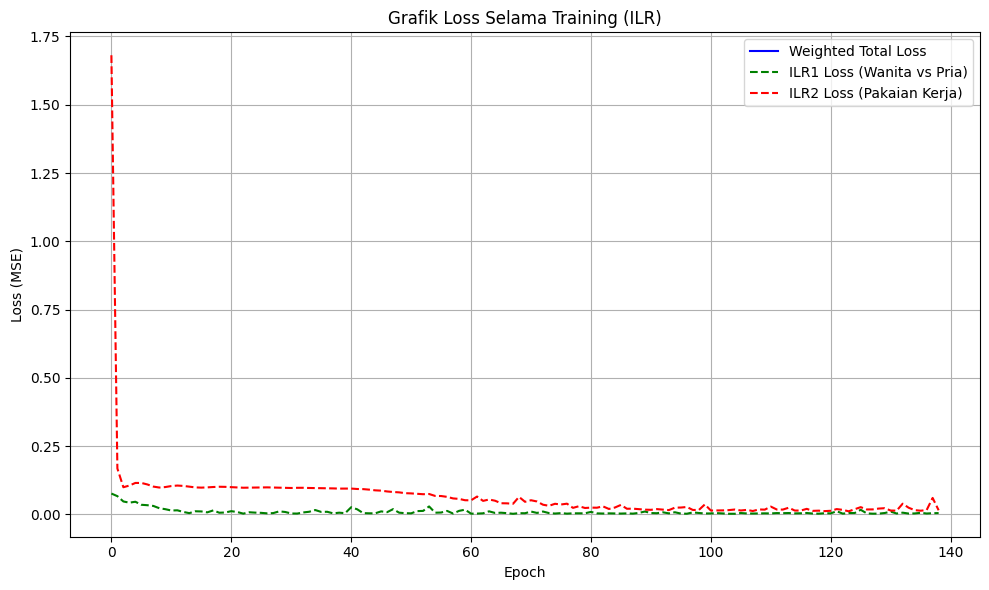

In [ ]:
import matplotlib.pyplot as plt

# Plot grafik loss MSE
plt.figure(figsize=(10, 6))
plt.plot(loss_history_total, label='Weighted Total Loss', color='blue')
plt.plot(loss_history_ilr1, label='ILR1 Loss (Wanita vs Pria)', color='green', linestyle='--')
plt.plot(loss_history_ilr2, label='ILR2 Loss (Pakaian Kerja)', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Grafik Loss Selama Training (ILR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### PREDIKSI DATA ILR ###

In [ ]:
# Step 7: Prediksi dan Evaluasi
with torch.no_grad():
    # Prediksi training
    pred_train = odeint(model, S_train[0], t_train, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi testing
    pred_test = odeint(model, S_train[-1], t_test, method='rk4', atol=1e-6, rtol=1e-6)

    # Prediksi future
    z0 = S_train[0]  # bentuknya torch.tensor dengan 3 elemen
    pred= odeint(model, z0, t_train, method='rk4', atol=1e-6, rtol=1e-6)
    pred_future = pred[-1]  # hasil prediksi 1 langkah ke depan

In [ ]:
print(pred_train)
print(pred_test)
print(pred_future)

tensor([[-0.2294,  3.3679],
        [-0.3642,  3.4157],
        [-0.5383,  3.4256],
        [-0.7076,  2.8960],
        [-0.8408,  2.3174],
        [-0.8724,  1.7391],
        [-0.7594,  1.6587],
        [-0.5767,  1.7110],
        [-0.3686,  1.7598]])
tensor([[-0.2814,  1.7749],
        [-0.2165,  1.7876],
        [-0.1680,  1.8002],
        [-0.1168,  1.8129],
        [-0.0513,  1.8255],
        [ 0.0048,  1.8381],
        [ 0.0411,  1.8503]])
tensor([-0.3454,  1.8044])


### INVERS TRANSFORMASI ILR ###

In [ ]:
# Inverse ILR Transform
def inverse_ilr(ilr):
    # ilr: shape (n, 2)
    z1 = np.exp(np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z2 = np.exp(-np.sqrt(1/2)*ilr[:,0] + np.sqrt(1/6)*ilr[:,1])
    z3 = np.exp(-np.sqrt(2/3)*ilr[:,1])
    total = z1 + z2 + z3
    return np.column_stack([z1/total, z2/total, z3/total])

In [ ]:
# Invers Data Transformasi ILR
X_1 = inverse_ilr(S_0)
X_1

array([[0.41626105, 0.57582433, 0.00791462],
       [0.40339244, 0.58846898, 0.00813858],
       [0.30235849, 0.69027277, 0.00736874],
       [0.26089767, 0.72610345, 0.01299889],
       [0.2249112 , 0.75135835, 0.02373044],
       [0.23015966, 0.70553179, 0.06430855],
       [0.24828343, 0.71196407, 0.0397525 ],
       [0.27709858, 0.66632649, 0.05657493],
       [0.38059458, 0.5665833 , 0.05282211],
       [0.33341157, 0.60531914, 0.06126929],
       [0.27137246, 0.61989216, 0.10873538],
       [0.29502296, 0.61194793, 0.09302911],
       [0.29867659, 0.58035905, 0.12096436],
       [0.39850771, 0.531648  , 0.0698443 ],
       [0.37376696, 0.5917721 , 0.03446095],
       [0.40500821, 0.52698855, 0.06800324]])

In [ ]:
# Invers Hasil Prediksi NMGM
pred_train_prop = inverse_ilr(pred_train.numpy())
pred_test_prop = inverse_ilr(pred_test.numpy())
pred_future_prop = inverse_ilr(pred_future.numpy().reshape(1, 2))

In [ ]:
print(pred_train_prop)
print(pred_test_prop)
print(pred_future_prop)

[[0.41626106 0.57582433 0.00791462]
 [0.37125862 0.62141747 0.00732391]
 [0.31614983 0.67688219 0.00696798]
 [0.26542636 0.72196017 0.01261346]
 [0.2277807  0.74805783 0.02416148]
 [0.21486131 0.73782279 0.04731589]
 [0.24089275 0.70505854 0.05404871]
 [0.29024559 0.65607588 0.05367853]
 [0.35279928 0.59415507 0.05304565]]
[[0.38059459 0.5665833  0.05282211]
 [0.40180634 0.54575332 0.05244034]
 [0.41800104 0.53008929 0.05190966]
 [0.4352659  0.51340828 0.05132582]
 [0.45742655 0.49186085 0.0507126 ]
 [0.47660488 0.47338868 0.05000644]
 [0.48917628 0.46154265 0.04928107]]
[[0.36102985 0.58840299 0.05056716]]


### PLOT HASIL PREDIKSI ###

In [ ]:
# Array Waktu untuk Plotting
time_full = np.arange(1, len(X_0)+2)
t_train_plot = np.arange(1, train_size + 1) # []
t_test_plot = np.arange(train_size + 1, train_size + test_size + 1)  # []
t_future_plot = np.arange(train_size + test_size + 1, train_size + test_size + 2)  # []

print("Waktu plot training:", t_train_plot)
print("Waktu plot testing:", t_test_plot)
print("Waktu plot future:", t_future_plot)

Waktu plot training: [1 2 3 4 5 6 7 8 9]
Waktu plot testing: [10 11 12 13 14 15 16]
Waktu plot future: [17]


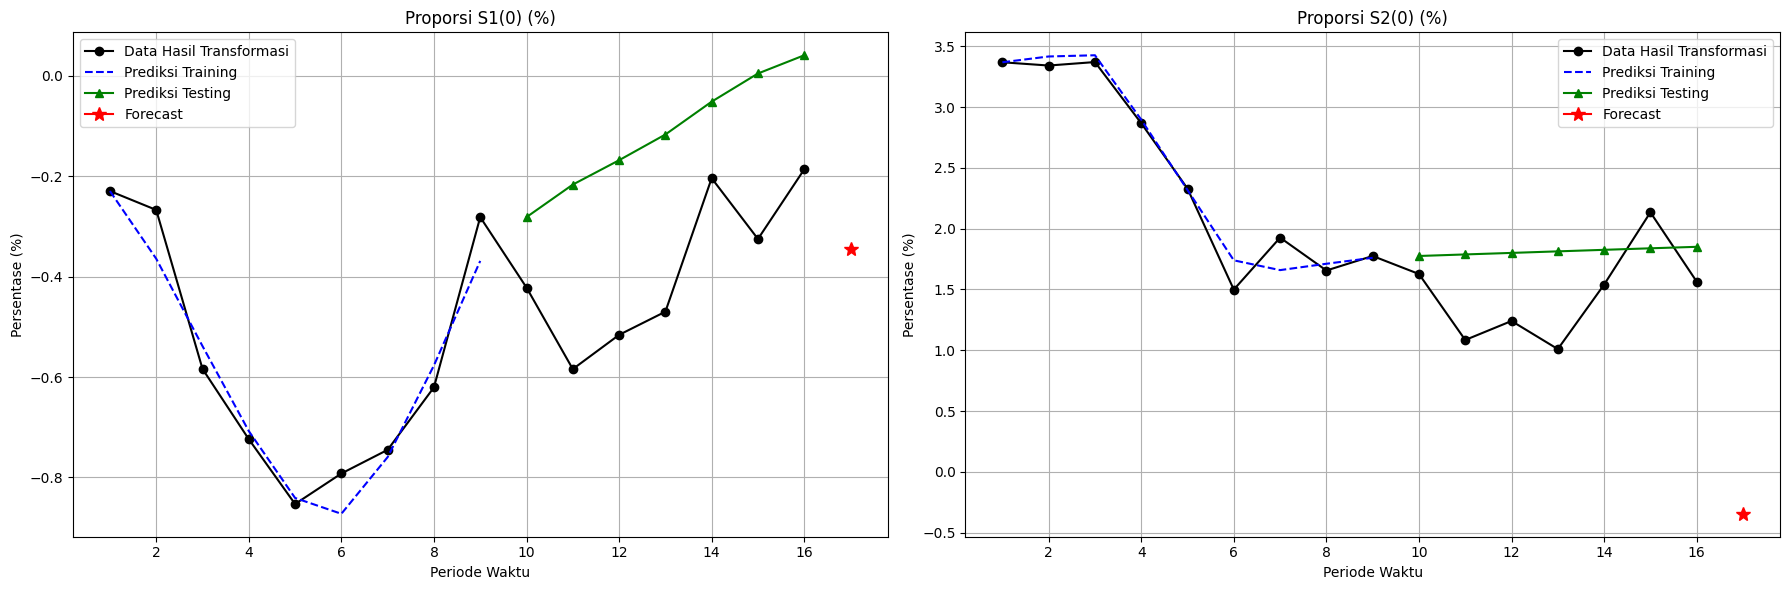

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
variabels = ['S1(0)', 'S2(0)']

for i in range(2):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        S_0[:, i],
        'ko-',
        label='Data Hasil Transformasi'
    )

    # Prediksi training (periode 1-10)
    axs[i].plot(
        t_train_plot,  # [1, 2, 3, ..., 10]
        pred_train[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode 11-13)
    axs[i].plot(
        t_test_plot,   # []
        pred_test[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode 14-16)
    axs[i].plot(
        t_future_plot, # [17]
        [pred_future[0]]* len(t_future_plot),
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

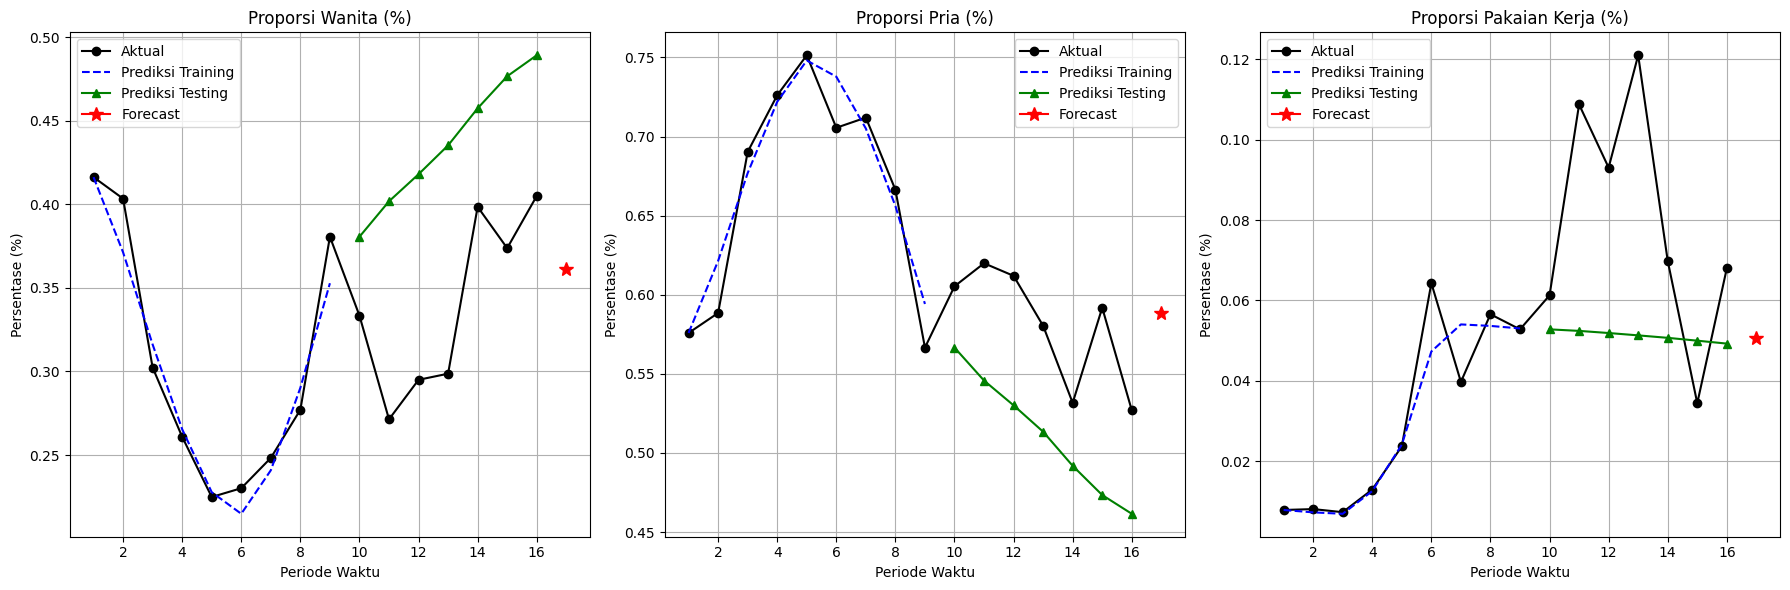

In [ ]:
from os import X_OK
import matplotlib.pyplot as plt

# Membuat plot untuk 3 variabel
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variabels = ['Wanita', 'Pria', 'Pakaian Kerja']

for i in range(3):
    # Data aktual
    axs[i].plot(
        np.arange(1, len(X_0) + 1),
        X_0[:, i],
        'ko-',
        label='Aktual'
    )

    # Prediksi training (periode )
    axs[i].plot(
        t_train_plot,  # []
        pred_train_prop[:, i],
        'b--',
        label='Prediksi Training'
    )

    # Prediksi testing (periode )
    axs[i].plot(
        t_test_plot,   # []
        pred_test_prop[:, i],
        'g^-',
        label='Prediksi Testing'
    )

    # Prediksi future (periode )
    axs[i].plot(
        t_future_plot, # []
        pred_future_prop[0, i],
        'r*-',
        markersize=10,
        label='Forecast'
    )

    axs[i].set_title(f'Proporsi {variabels[i]} (%)')
    axs[i].set_xlabel('Periode Waktu')
    axs[i].set_ylabel('Persentase (%)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

### EVALUASI MODEL ###

In [ ]:
# Evaluasi Model Keseluruhan
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape = mean_absolute_percentage_error(train_actual, pred_train_prop)
print(f"\nMAPE pada Data Training: {mape*100:.2f}%")

mape = mean_absolute_percentage_error(test_actual, pred_test_prop)
print(f"\nMAPE pada Data Testing: {mape*100:.2f}%")


MAPE pada Data Training: 5.40%

MAPE pada Data Testing: 26.82%


In [ ]:
# Evaluasi Model per Variabel
train_actual = inverse_ilr(S_train.numpy())
test_actual = inverse_ilr(S_test.numpy())

mape_train_per_var = [mean_absolute_percentage_error(train_actual[:, i], pred_train_prop[:, i]) for i in range(train_actual.shape[1])]
mape_test_per_var = [mean_absolute_percentage_error(test_actual[:, i], pred_test_prop[:, i]) for i in range(test_actual.shape[1])]

for i, var in enumerate(['Wanita', 'Pria', 'Pakaian Kerja']):
    print(f"MAPE Training {var}: {mape_train_per_var[i]*100:.2f}%")
    print(f"MAPE Testing {var}: {mape_test_per_var[i]*100:.2f}%")

MAPE Training Wanita: 4.13%
MAPE Testing Wanita: 30.39%
MAPE Training Pria: 2.28%
MAPE Testing Pria: 11.88%
MAPE Training Pakaian Kerja: 9.80%
MAPE Testing Pakaian Kerja: 38.19%
